In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Final_data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.head()

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
0,OPP_0,2018-07-05 21:16:20+00:00,Email newsletter,0,1,0,1
1,OPP_0,2018-07-22 21:16:20+00:00,LinkedIn ad,0,1,0,2
2,OPP_0,2018-08-06 21:16:20+00:00,YouTube,0,1,0,3
3,OPP_0,2018-08-28 21:16:20+00:00,Website,0,1,0,4
4,OPP_0,2019-02-17 21:16:20+00:00,Enquiry,0,0,1,16


In [3]:
data.shape

(619117, 7)

In [4]:
data.isna().sum()

Opportunity_ID       0
Timestamp            0
Opportunity_stage    0
conversions          0
market_stage         0
sales_stage          0
visit                0
dtype: int64

In [5]:
data['Opportunity_stage'].value_counts()

YouTube                125963
Website                120649
Email newsletter        84613
LinkedIn ad             73089
Google ad               63324
Lead qualified          32644
Enquiry                 32640
Connect call            26127
Discovery call          19597
Demonstration           14696
Stakeholders buy in      9847
Negotiation              6593
Conference               4469
Contract signed          3297
Customer referral        1228
Published article         341
Name: Opportunity_stage, dtype: int64

In [6]:
chan = list(data['Opportunity_stage'].unique())

In [7]:
sales_channels = ['Enquiry','Lead qualified','Connect call','Discovery call','Demonstration','Stakeholders buy in','Negotiation','Contract signed']

In [8]:
markerting_channels = [j for j in chan if j not in sales_channels ]
markerting_channels

['Email newsletter',
 'LinkedIn ad',
 'YouTube',
 'Website',
 'Google ad',
 'Conference',
 'Customer referral',
 'Published article']

In [9]:
len(markerting_channels)

8

In [10]:
data[data.Opportunity_stage == 'Published article(Wallstreet_journal)']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [11]:
data.Opportunity_stage.unique()

array(['Email newsletter', 'LinkedIn ad', 'YouTube', 'Website', 'Enquiry',
       'Lead qualified', 'Connect call', 'Discovery call',
       'Demonstration', 'Stakeholders buy in', 'Negotiation', 'Google ad',
       'Contract signed', 'Conference', 'Customer referral',
       'Published article'], dtype=object)

In [12]:
data['conversions'] = 0
conversions_list = (data.Opportunity_stage == 'Contract signed') 
data.loc[conversions_list, 'conversions'] = 1

In [13]:
data

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
0,OPP_0,2018-07-05 21:16:20+00:00,Email newsletter,0,1,0,1
1,OPP_0,2018-07-22 21:16:20+00:00,LinkedIn ad,0,1,0,2
2,OPP_0,2018-08-06 21:16:20+00:00,YouTube,0,1,0,3
3,OPP_0,2018-08-28 21:16:20+00:00,Website,0,1,0,4
4,OPP_0,2019-02-17 21:16:20+00:00,Enquiry,0,0,1,16
...,...,...,...,...,...,...,...
619112,OPP_99998,2018-07-22 09:59:59+00:00,Email newsletter,0,1,0,11
619113,OPP_99998,2018-07-23 07:40:12+00:00,Email newsletter,0,1,0,12
619114,OPP_99998,2018-07-23 08:40:43+00:00,LinkedIn ad,0,1,0,13
619115,OPP_99998,2018-07-29 10:56:07+00:00,Website,0,1,0,14


In [14]:
data['market_stage'] = 0
markets_list = (data['Opportunity_stage'].isin(markerting_channels)) 
data.loc[markets_list, 'market_stage'] = 1

In [15]:
data['sales_stage'] = 0
sales_list = (data['Opportunity_stage'].isin(sales_channels)) 
data.loc[sales_list, 'sales_stage'] = 1

In [16]:
data[data.Opportunity_ID == 'OPP_0']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
0,OPP_0,2018-07-05 21:16:20+00:00,Email newsletter,0,1,0,1
1,OPP_0,2018-07-22 21:16:20+00:00,LinkedIn ad,0,1,0,2
2,OPP_0,2018-08-06 21:16:20+00:00,YouTube,0,1,0,3
3,OPP_0,2018-08-28 21:16:20+00:00,Website,0,1,0,4
4,OPP_0,2019-02-17 21:16:20+00:00,Enquiry,0,0,1,16
5,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17
6,OPP_0,2019-03-22 21:16:20+00:00,Connect call,0,0,1,18
7,OPP_0,2019-04-12 21:16:20+00:00,Discovery call,0,0,1,19


In [17]:
unique_prospects = list(data.Opportunity_ID.unique())
print('Number of unique prospects :',len(unique_prospects))

Number of unique prospects : 130008


In [18]:
qualified = data[data.Opportunity_stage == 'Lead qualified']
qualified

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
5,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17
13,OPP_1,2018-09-22 12:23:16+00:00,Lead qualified,0,0,1,8
19,OPP_10,2019-04-21 08:35:09+00:00,Lead qualified,0,0,1,19
25,OPP_100,2018-11-09 08:22:43+00:00,Lead qualified,0,0,1,10
32,OPP_1000,2018-10-05 17:07:57+00:00,Lead qualified,0,0,1,8
...,...,...,...,...,...,...,...
618908,OPP_9994,2018-09-11 12:33:11+00:00,Lead qualified,0,0,1,5
618940,OPP_9995,2018-10-31 21:46:26+00:00,Lead qualified,0,0,1,8
618967,OPP_9996,2018-09-30 12:49:23+00:00,Lead qualified,0,0,1,7
619039,OPP_9998,2018-08-24 17:25:00+00:00,Lead qualified,0,0,1,6


In [19]:
converted = data[data.conversions == 1]
converted

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
48,OPP_10000,2019-02-21 14:49:02+00:00,Contract signed,1,0,1,16
310,OPP_10006,2018-12-27 15:45:54+00:00,Contract signed,1,0,1,13
490,OPP_10010,2018-12-10 21:10:06+00:00,Contract signed,1,0,1,13
879,OPP_10019,2018-11-27 13:04:01+00:00,Contract signed,1,0,1,13
927,OPP_1002,2018-12-09 11:15:04+00:00,Contract signed,1,0,1,11
...,...,...,...,...,...,...,...
617888,OPP_9967,2019-01-27 14:45:32+00:00,Contract signed,1,0,1,16
617943,OPP_9968,2018-12-02 11:58:58+00:00,Contract signed,1,0,1,12
618512,OPP_9984,2018-12-20 14:18:50+00:00,Contract signed,1,0,1,12
618552,OPP_9985,2019-04-08 17:31:12+00:00,Contract signed,1,0,1,19


In [20]:
print('Number of prospects:', len(unique_prospects))
print('Number of qualified leads:', len(qualified))
print('Number of customers:', len(converted))

print('Conversion Rate:',round((len(converted)/len(qualified))*100,3),'%')

Number of prospects: 130008
Number of qualified leads: 32644
Number of customers: 3297
Conversion Rate: 10.1 %


In [21]:
converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 48 to 618946
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Opportunity_ID     3297 non-null   object             
 1   Timestamp          3297 non-null   datetime64[ns, UTC]
 2   Opportunity_stage  3297 non-null   object             
 3   conversions        3297 non-null   int64              
 4   market_stage       3297 non-null   int64              
 5   sales_stage        3297 non-null   int64              
 6   visit              3297 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 206.1+ KB


In [22]:
paths = data.groupby('Opportunity_ID')['Opportunity_stage'].aggregate(lambda x: x.tolist()).reset_index()
paths

,Opportunity_ID,Opportunity_stage
0,OPP_0,"[Email newsletter, LinkedIn ad, YouTube, Websi..."
1,OPP_1,"[Email newsletter, LinkedIn ad, YouTube, Websi..."
2,OPP_10,"[Email newsletter, LinkedIn ad, YouTube, Websi..."
3,OPP_100,"[Email newsletter, LinkedIn ad, YouTube, Websi..."
4,OPP_1000,"[Email newsletter, LinkedIn ad, YouTube, Websi..."
...,...,...
130003,OPP_99995,"[Email newsletter, Email newsletter]"
130004,OPP_99996,[YouTube]
130005,OPP_99997,[Website]
130006,OPP_99998,"[Email newsletter, Email newsletter, Email new..."


In [23]:
paths['Opportunity_stage'][0]

['Email newsletter',
 'LinkedIn ad',
 'YouTube',
 'Website',
 'Enquiry',
 'Lead qualified',
 'Connect call',
 'Discovery call']

In [25]:
#paths means non-coverted ones but qualified
paths['market_chan'] = ''
paths['sales_chan'] = ''
paths['num_sales_chan'] = 0
paths['num_mark_chan'] = 0
for i in range(len(paths)):
    paths['market_chan'].loc[i] = [j for j in paths.loc[i,'Opportunity_stage'] if j not in sales_channels]
    paths['num_mark_chan'].loc[i] = len(paths['market_chan'].loc[i])
    paths['sales_chan'].loc[i] = [j for j in paths.loc[i,'Opportunity_stage'] if j in sales_channels]
    paths['num_sales_chan'].loc[i] = len(paths['sales_chan'].loc[i])

In [26]:
paths


,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan
0,OPP_0,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",4,4
1,OPP_1,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified]",2,4
2,OPP_10,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified]",2,4
3,OPP_100,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call]",3,4
4,OPP_1000,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",7,4
...,...,...,...,...,...,...
130003,OPP_99995,"[Email newsletter, Email newsletter]","[Email newsletter, Email newsletter]",[],0,2
130004,OPP_99996,[YouTube],[YouTube],[],0,1
130005,OPP_99997,[Website],[Website],[],0,1
130006,OPP_99998,"[Email newsletter, Email newsletter, Email new...","[Email newsletter, Email newsletter, Email new...",[],0,14


In [27]:
new = list(converted.Opportunity_ID)
customer_paths = paths.loc[paths['Opportunity_ID'].isin(new)]
customer_paths


,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan
5,OPP_10000,"[Google ad, YouTube, Website, Enquiry, Lead qu...","[Google ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",8,3
71,OPP_10006,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",8,4
116,OPP_10010,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",8,4
215,OPP_10019,"[Google ad, YouTube, Website, Enquiry, Lead qu...","[Google ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",8,3
226,OPP_1002,"[Google ad, Email newsletter, YouTube, Enquiry...","[Google ad, Email newsletter, YouTube]","[Enquiry, Lead qualified, Connect call, Discov...",8,3
...,...,...,...,...,...,...
129643,OPP_9967,"[Customer referral, Email newsletter, Email ne...","[Customer referral, Email newsletter, Email ne...","[Enquiry, Lead qualified, Connect call, Discov...",8,8
129654,OPP_9968,"[YouTube, LinkedIn ad, Email newsletter, Websi...","[YouTube, LinkedIn ad, Email newsletter, Website]","[Enquiry, Lead qualified, Connect call, Discov...",8,4
129832,OPP_9984,"[LinkedIn ad, Google ad, YouTube, LinkedIn ad,...","[LinkedIn ad, Google ad, YouTube, LinkedIn ad]","[Enquiry, Lead qualified, Connect call, Discov...",8,4
129843,OPP_9985,"[Website, Website, Google ad, Website, Email n...","[Website, Website, Google ad, Website, Email n...","[Enquiry, Lead qualified, Connect call, Discov...",8,11


In [28]:
mark_journeys_new = customer_paths.market_chan.value_counts()
col1 = list(mark_journeys_new.index)
col2 = list(mark_journeys_new)
mark_journeys_new = pd.DataFrame(list(zip(col1,col2)), columns =['journey', 'number_of_opportunities'])
mark_journeys_new


,journey,number_of_opportunities
0,"[Email newsletter, LinkedIn ad, YouTube, Website]",1013
1,"[Google ad, YouTube, Website]",856
2,"[Google ad, Email newsletter, Website]",812
3,"[Google ad, Email newsletter, YouTube]",19
4,"[Google ad, LinkedIn ad, YouTube]",19
...,...,...
178,"[YouTube, YouTube, YouTube, YouTube, YouTube, ...",1
179,"[Google ad, Website, Website, Website, Website...",1
180,"[LinkedIn ad, Google ad, LinkedIn ad, Website,...",1
181,"[Email newsletter, LinkedIn ad, LinkedIn ad, L...",1


In [29]:
paths['conversions'] = 0
for i in paths.index:
    if 'Contract signed' in paths.loc[i,'sales_chan']:
        paths.loc[i,'conversions'] = 1
paths

,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan,conversions
0,OPP_0,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",4,4,0
1,OPP_1,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified]",2,4,0
2,OPP_10,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified]",2,4,0
3,OPP_100,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call]",3,4,0
4,OPP_1000,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",7,4,0
...,...,...,...,...,...,...,...
130003,OPP_99995,"[Email newsletter, Email newsletter]","[Email newsletter, Email newsletter]",[],0,2,0
130004,OPP_99996,[YouTube],[YouTube],[],0,1,0
130005,OPP_99997,[Website],[Website],[],0,1,0
130006,OPP_99998,"[Email newsletter, Email newsletter, Email new...","[Email newsletter, Email newsletter, Email new...",[],0,14,0


In [30]:
paths['qualified'] = 0
for i in paths.index:
    if 'Lead qualified' in paths.loc[i,'sales_chan']:
        paths.loc[i,'qualified'] = 1
paths

,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan,conversions,qualified
0,OPP_0,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",4,4,0,1
1,OPP_1,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified]",2,4,0,1
2,OPP_10,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified]",2,4,0,1
3,OPP_100,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call]",3,4,0,1
4,OPP_1000,"[Email newsletter, LinkedIn ad, YouTube, Websi...","[Email newsletter, LinkedIn ad, YouTube, Website]","[Enquiry, Lead qualified, Connect call, Discov...",7,4,0,1
...,...,...,...,...,...,...,...,...
130003,OPP_99995,"[Email newsletter, Email newsletter]","[Email newsletter, Email newsletter]",[],0,2,0,0
130004,OPP_99996,[YouTube],[YouTube],[],0,1,0,0
130005,OPP_99997,[Website],[Website],[],0,1,0,0
130006,OPP_99998,"[Email newsletter, Email newsletter, Email new...","[Email newsletter, Email newsletter, Email new...",[],0,14,0,0


In [30]:
req = []
for i in range(8):
    req.append(mark_journeys_new.loc[i, 'journey'])

req

[['Email newsletter', 'LinkedIn ad', 'YouTube', 'Website'],
 ['Google ad', 'YouTube', 'Website'],
 ['Google ad', 'Email newsletter', 'Website'],
 ['Google ad', 'Email newsletter', 'YouTube'],
 ['Google ad', 'LinkedIn ad', 'YouTube'],
 ['Email newsletter', 'Email newsletter', 'YouTube'],
 ['Google ad', 'Email newsletter', 'LinkedIn ad'],
 ['Google ad', 'Website', 'LinkedIn ad']]

In [ ]:
non_con = paths.loc[(paths.conversions == 0) & (paths.num_mark_chan > 3)]
non_con_ids = list(non_con.Opportunity_ID)
len(non_con_ids)

In [ ]:
data_sub = data.loc[data['Opportunity_ID'].isin(non_con_ids[:35000])]
data_sub

In [ ]:
def right_table(x):
    d = pd.DataFrame()
    d['Opportunity_stage'] = x
    d['visit'] = d.index + 1

    return d

In [ ]:
a1 = right_table(req[0])
a1

In [ ]:
data_sub1 = data_sub[data_sub['visit'] <= 4]
data_sub1

In [ ]:
first_jour = data_sub1.merge(a1, how = 'left', on='visit')
first_jour

In [ ]:
first_jour.drop('Opportunity_stage_x', axis = 1, inplace = True)
first_jour.rename(columns = {'Opportunity_stage_y':'Opportunity_stage'}, inplace = True)
first_jour = first_jour[['Opportunity_ID','Timestamp','Opportunity_stage','conversions','market_stage','sales_stage','visit']]
first_jour

In [ ]:
new_data = data.copy()

In [ ]:
r1 = new_data.loc[(new_data['Opportunity_ID'].isin(non_con_ids[:35000])) & (new_data['visit'] <= 4) & (new_data['market_stage'] == 1)].index
new_data = new_data.drop(r1,axis = 0)

new_data = new_data.append(first_jour, ignore_index=True)

r2 = new_data.loc[(new_data['Opportunity_ID'].isin(non_con_ids[:35000])) & (new_data['visit'] > 4) & (new_data['market_stage'] == 1)].index
new_data = new_data.drop(r2,axis = 0)
new_data = new_data.sort_values(by=['Opportunity_ID','Timestamp'])
new_data

In [ ]:
new_data.Opportunity_ID.nunique()

In [ ]:
non_con2 = paths.loc[(paths.conversions == 0) & (paths.num_mark_chan == 3)]
non_con2_ids = list(non_con2.Opportunity_ID)
len(non_con2_ids)

In [ ]:
data_sub2 = data.loc[data['Opportunity_ID'].isin(non_con2_ids[:15000])]
data_sub2

In [ ]:
data_sub2.nunique()

In [ ]:
data_sub3 = data_sub2[data_sub2['visit'] <= 3]
data_sub3

In [ ]:
a2 = right_table(req[1])
a2

In [ ]:
data_sub3

In [ ]:
second_jour = data_sub3.merge(a2, how = 'left', on='visit')
second_jour

In [ ]:
second_jour.drop('Opportunity_stage_x', axis = 1, inplace = True)
second_jour.rename(columns = {'Opportunity_stage_y':'Opportunity_stage'}, inplace = True)
second_jour = second_jour[['Opportunity_ID','Timestamp','Opportunity_stage','conversions','market_stage','sales_stage','visit']]
second_jour

In [ ]:
r5 = new_data.loc[(new_data['Opportunity_ID'].isin(non_con2_ids[:15000])) & (new_data['visit'] <= 3) & (new_data['market_stage'] == 1)].index
new_data = new_data.drop(r5,axis = 0)

new_data = new_data.append(second_jour, ignore_index=True)

r6 = new_data.loc[(new_data['Opportunity_ID'].isin(non_con2_ids[:15000])) & (new_data['visit'] > 3) & (new_data['market_stage'] == 1)].index
new_data = new_data.drop(r6,axis = 0)
new_data = new_data.sort_values(by=['Opportunity_ID','Timestamp'])
new_data

In [ ]:
one_chan_inds = list(paths[paths.num_mark_chan == 1]['Opportunity_ID'])
len(one_chan_inds)

In [ ]:
two_chan_inds = list(paths[paths.num_mark_chan == 2]['Opportunity_ID'])
len(two_chan_inds)

In [ ]:
one_chan = new_data[new_data['Opportunity_ID'].isin(one_chan_inds[:32000])]
one_chan

In [ ]:
one_chan = one_chan.loc[one_chan.index.repeat(3)].reset_index(drop=True)
one_chan['visit'] = one_chan.groupby('Opportunity_ID').cumcount() + 1
one_chan

In [ ]:
import datetime
import random
for i in one_chan.index:
    if one_chan.loc[i,'visit'] == 2:
        one_chan.loc[i,'Timestamp'] = one_chan.loc[i,'Timestamp'] + datetime.timedelta(days=random.randint(20,60))

    if one_chan.loc[i,'visit'] == 3:
        one_chan.loc[i,'Timestamp'] = one_chan.loc[i,'Timestamp'] + datetime.timedelta(days=random.randint(70,110))

one_chan

In [ ]:
two_chan = new_data[new_data['Opportunity_ID'].isin(two_chan_inds[:27000])]
two_chan

In [ ]:
two_chan = two_chan.loc[two_chan.index.repeat(2)].reset_index(drop=True)
two_chan['visit'] = two_chan.groupby('Opportunity_ID').cumcount() + 1
two_chan

In [ ]:
for i in two_chan.index:
    if two_chan.loc[i,'visit'] == 2:
        two_chan.loc[i,'Timestamp'] = two_chan.loc[i,'Timestamp'] + datetime.timedelta(days=random.randint(20,60))

    if two_chan.loc[i,'visit'] == 3:
        two_chan.loc[i,'Timestamp'] = two_chan.loc[i,'Timestamp'] + datetime.timedelta(days=random.randint(70,110))

    if two_chan.loc[i,'visit'] == 4:
        two_chan.loc[i,'Timestamp'] = two_chan.loc[i,'Timestamp'] + datetime.timedelta(days=random.randint(110,150))

two_chan

In [ ]:
second_jour_2 = one_chan.merge(a2, how = 'left', on='visit')

In [ ]:
second_jour_2.drop('Opportunity_stage_x', axis = 1, inplace = True)
second_jour_2.rename(columns = {'Opportunity_stage_y':'Opportunity_stage'}, inplace = True)
second_jour_2 = second_jour_2[['Opportunity_ID','Timestamp','Opportunity_stage','conversions','market_stage','sales_stage','visit']]
second_jour_2

In [ ]:
r7 = new_data.loc[(new_data['Opportunity_ID'].isin(one_chan_inds[:32000])) & (new_data['visit'] <= 3) & (new_data['market_stage'] == 1)].index
new_data = new_data.drop(r7,axis = 0)

new_data = new_data.append(second_jour_2, ignore_index=True)

r8 = new_data.loc[(new_data['Opportunity_ID'].isin(one_chan_inds[:32000])) & (new_data['visit'] > 3) & (new_data['market_stage'] == 1)].index
new_data = new_data.drop(r8,axis = 0)
new_data = new_data.sort_values(by=['Opportunity_ID','Timestamp'])
new_data

In [ ]:
new_data.Opportunity_ID.nunique()

In [ ]:
first_jour_2 = two_chan.merge(a1, how = 'left', on='visit')

In [ ]:
first_jour_2.drop('Opportunity_stage_x', axis = 1, inplace = True)
first_jour_2.rename(columns = {'Opportunity_stage_y':'Opportunity_stage'}, inplace = True)
first_jour_2 = first_jour_2[['Opportunity_ID','Timestamp','Opportunity_stage','conversions','market_stage','sales_stage','visit']]
first_jour_2

In [ ]:
r9 = new_data.loc[(new_data['Opportunity_ID'].isin(two_chan_inds[:27000])) & (new_data['visit'] <= 4) & (new_data['market_stage'] == 1)].index
new_data = new_data.drop(r9,axis = 0)

new_data = new_data.append(first_jour_2, ignore_index=True)

r10 = new_data.loc[(new_data['Opportunity_ID'].isin(two_chan_inds[:27000])) & (new_data['visit'] > 4) & (new_data['market_stage'] == 1)].index
new_data = new_data.drop(r10,axis = 0)
new_data = new_data.sort_values(by=['Opportunity_ID','Timestamp'])
new_data

In [ ]:
new_data.Opportunity_ID.nunique()

In [ ]:
new_data.to_csv('Final_data.csv', index=False)

In [ ]:
paths1 = new_data.groupby('Opportunity_ID')['Opportunity_stage'].aggregate(lambda x: x.tolist()).reset_index()

paths1['market_chan'] = ''
paths1['sales_chan'] = ''

paths1['num_sales_chan'] = 0
paths1['num_mark_chan'] = 0

for i in range(len(paths1)):
    paths1['market_chan'].loc[i] = [j for j in paths1.loc[i,'Opportunity_stage'] if j not in sales_channels]
    paths1['num_mark_chan'].loc[i] = len(paths1['market_chan'].loc[i])
    paths1['sales_chan'].loc[i] = [j for j in paths1.loc[i,'Opportunity_stage'] if j in sales_channels]
    paths1['num_sales_chan'].loc[i] = len(paths1['sales_chan'].loc[i])

new2 = list(new_data[new_data.conversions == 1]['Opportunity_ID'])
customer_paths2 = paths1.loc[paths1['Opportunity_ID'].isin(new2)]

mark_new = customer_paths2.market_chan.value_counts()
col_new1 = list(mark_new.index)
col_new2 = list(mark_new)
mark_new = pd.DataFrame(list(zip(col_new1,col_new2)), columns =['journey', 'number_of_opportunities'])
mark_new

In [ ]:
market_channel_journeys = paths1['market_chan'].value_counts()
col001 = list(market_channel_journeys.index)
col002 = list(market_channel_journeys)
market_channel_journeys = pd.DataFrame(list(zip(col001,col002)), columns =['journey', 'number_of_opportunities'])
market_channel_journeys

In [ ]:
market_channel_journeys.to_csv('final_market_journeys.csv', index=False)

In [ ]:
markerting_channels

In [32]:
mark_journeys_new

,journey,number_of_opportunities
0,"[Email newsletter, LinkedIn ad, YouTube, Website]",1013
1,"[Google ad, YouTube, Website]",856
2,"[Google ad, Email newsletter, Website]",812
3,"[Google ad, Email newsletter, YouTube]",19
4,"[Google ad, LinkedIn ad, YouTube]",19
...,...,...
178,"[YouTube, YouTube, YouTube, YouTube, YouTube, ...",1
179,"[Google ad, Website, Website, Website, Website...",1
180,"[LinkedIn ad, Google ad, LinkedIn ad, Website,...",1
181,"[Email newsletter, LinkedIn ad, LinkedIn ad, L...",1


In [ ]:
new_data

In [ ]:
new_data.Opportunity_stage.value_counts()

In [31]:
opps = []
for i in mark_journeys_new.index[:3]:
        opps.append(mark_journeys_new.loc[i,'journey'])

len(opps)

3

In [32]:
opps

[['Email newsletter', 'LinkedIn ad', 'YouTube', 'Website'],
 ['Google ad', 'YouTube', 'Website'],
 ['Google ad', 'Email newsletter', 'Website']]

In [33]:
id = list(paths[paths['market_chan'].isin(opps) & (paths['conversions'] == 1)]['Opportunity_ID'])

In [34]:
len(id)

2681

In [35]:
df = data.copy()

In [ ]:
req

[['Email newsletter', 'LinkedIn ad', 'YouTube', 'Website'],
 ['Google ad', 'YouTube', 'Website'],
 ['Google ad', 'Email newsletter', 'Website'],
 ['Google ad', 'Email newsletter', 'YouTube'],
 ['Google ad', 'LinkedIn ad', 'YouTube'],
 ['Email newsletter', 'Email newsletter', 'YouTube'],
 ['Google ad', 'Email newsletter', 'LinkedIn ad'],
 ['Google ad', 'Website', 'LinkedIn ad']]

In [36]:
you_index = df.loc[(df['Opportunity_ID'].isin(id)) & (df['Opportunity_stage'] == 'YouTube')].index
len(you_index)

1869

In [37]:
df.at[you_index,'Opportunity_stage'] = 'YouTube(Product_support)'

In [38]:
email_index = df.loc[(df['Opportunity_ID'].isin(id)) & (df['Opportunity_stage'] == 'Email newsletter')].index
len(email_index)

1825

In [39]:
df.at[email_index,'Opportunity_stage'] = 'Email newsletter(Marketing)'

In [40]:
website_index = df.loc[(df['Opportunity_ID'].isin(id)) & (df['Opportunity_stage'] == 'Website')].index
len(website_index)

2681

In [41]:
df.at[website_index,'Opportunity_stage'] = 'Website(Product_page)'

In [42]:
google_index = df.loc[(df['Opportunity_ID'].isin(id)) & (df['Opportunity_stage'] == 'Google ad')].index
df.at[google_index,'Opportunity_stage'] = 'Google ad(Display_ad_campaign)'

In [43]:
linked_index = df.loc[(df['Opportunity_ID'].isin(id)) & (df['Opportunity_stage'] == 'LinkedIn ad')].index
df.at[linked_index,'Opportunity_stage'] = 'LinkedIn ad(linkedin post)'

In [44]:
df[df.Opportunity_stage == 'LinkedIn ad(linkedin post)']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
300,OPP_10006,2018-07-19 15:45:54+00:00,LinkedIn ad(linkedin post),0,1,0,2
480,OPP_10010,2018-08-06 21:10:06+00:00,LinkedIn ad(linkedin post),0,1,0,2
1415,OPP_10031,2018-07-18 16:17:22+00:00,LinkedIn ad(linkedin post),0,1,0,2
1868,OPP_10041,2018-07-04 08:18:49+00:00,LinkedIn ad(linkedin post),0,1,0,2
5809,OPP_10131,2018-08-07 11:33:00+00:00,LinkedIn ad(linkedin post),0,1,0,2
...,...,...,...,...,...,...,...
576626,OPP_8933,2018-07-31 13:56:32+00:00,LinkedIn ad(linkedin post),0,1,0,2
576723,OPP_8934,2018-08-20 14:56:58+00:00,LinkedIn ad(linkedin post),0,1,0,2
576961,OPP_8939,2018-07-30 11:49:41+00:00,LinkedIn ad(linkedin post),0,1,0,2
587644,OPP_9164,2018-07-30 18:21:11+00:00,LinkedIn ad(linkedin post),0,1,0,2


In [45]:
id1 = list(paths[paths['market_chan'].isin(opps) & (paths['conversions'] == 0)]['Opportunity_ID'])
len(id1)

109021

In [46]:
you_index_1 = df.loc[(df['Opportunity_ID'].isin(id1)) & (df['Opportunity_stage'] == 'YouTube')].index
len(you_index_1)

109011

In [47]:
df.at[you_index_1,'Opportunity_stage'] = 'YouTube(Product_support)'

In [48]:
email_index_1 = df.loc[(df['Opportunity_ID'].isin(id1)) & (df['Opportunity_stage'] == 'Email newsletter')].index
len(email_index_1)

62016

In [49]:
df.at[email_index_1[:49600],'Opportunity_stage'] = 'Email newsletter(Marketing)'
df.at[email_index_1[49600:], 'Opportunity_stage'] = 'Email(Support)'

In [50]:
website_index_1 = df.loc[(df['Opportunity_ID'].isin(id1)) & (df['Opportunity_stage'] == 'Website')].index
len(website_index_1)

109021

In [51]:
df[df.Opportunity_stage == 'Email newsletter(Marketing)']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
0,OPP_0,2018-07-05 21:16:20+00:00,Email newsletter(Marketing),0,1,0,1
8,OPP_1,2018-07-04 12:23:16+00:00,Email newsletter(Marketing),0,1,0,1
14,OPP_10,2018-07-11 08:35:09+00:00,Email newsletter(Marketing),0,1,0,1
20,OPP_100,2018-07-04 08:22:43+00:00,Email newsletter(Marketing),0,1,0,1
27,OPP_1000,2018-07-03 17:07:57+00:00,Email newsletter(Marketing),0,1,0,1
...,...,...,...,...,...,...,...
586627,OPP_9136,2018-07-21 21:28:22+00:00,Email newsletter(Marketing),0,1,0,2
587006,OPP_9147,2018-07-28 09:20:28+00:00,Email newsletter(Marketing),0,1,0,2
587643,OPP_9164,2018-07-19 18:21:11+00:00,Email newsletter(Marketing),0,1,0,1
588081,OPP_9176,2018-07-25 13:05:44+00:00,Email newsletter(Marketing),0,1,0,1


In [52]:
df.at[website_index_1[:87220],'Opportunity_stage'] = 'Website(Product_page)'
df.at[website_index_1[87220:],'Opportunity_stage'] = 'Website(Support_pages)'

In [53]:
linked_index_1 = df.loc[(df['Opportunity_ID'].isin(id1)) & (df['Opportunity_stage'] == 'LinkedIn ad')].index
len(linked_index_1)

62006

In [54]:
df.at[linked_index_1[:40000],'Opportunity_stage'] = 'LinkedIn ad(Content_page)'
df.at[linked_index_1[40000:50000],'Opportunity_stage'] = 'LinkedIn ad(Webinar/Conference)'
df.at[linked_index_1[50000:],'Opportunity_stage'] = 'LinkedIn ad(Product)'

In [55]:
google_index_1 = df.loc[(df['Opportunity_ID'].isin(id1)) & (df['Opportunity_stage'] == 'Google ad')].index
len(google_index_1)

47015

In [56]:
df.at[google_index_1[:35000],'Opportunity_stage'] = 'Google ad(Display_ad_campaign)'
df.at[google_index_1[35000:42000],'Opportunity_stage'] = 'Google ad(Product)'
df.at[google_index_1[42000:],'Opportunity_stage'] = 'Google ad(Webinar/Conference)'

In [57]:
df[df.Opportunity_stage == 'Google ad(Product)']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
451972,OPP_64154,2018-07-04 10:22:23+00:00,Google ad(Product),0,1,0,1
451975,OPP_64155,2018-07-13 16:21:35+00:00,Google ad(Product),0,1,0,1
451978,OPP_64156,2018-07-02 11:36:16+00:00,Google ad(Product),0,1,0,1
451989,OPP_64159,2018-07-21 19:10:26+00:00,Google ad(Product),0,1,0,1
451992,OPP_6416,2018-07-21 17:52:09+00:00,Google ad(Product),0,1,0,1
...,...,...,...,...,...,...,...
517634,OPP_77811,2018-07-18 01:29:51+00:00,Google ad(Product),0,1,0,1
517637,OPP_77812,2018-07-27 19:25:12+00:00,Google ad(Product),0,1,0,1
517640,OPP_77813,2018-07-10 21:37:52+00:00,Google ad(Product),0,1,0,1
517651,OPP_77816,2018-07-17 19:31:57+00:00,Google ad(Product),0,1,0,1


In [58]:
linked_index_2 = df[df['Opportunity_stage'] == 'LinkedIn ad'].index
len(linked_index_2)

10070

In [59]:
df.at[linked_index_2[:8000],'Opportunity_stage'] = 'LinkedIn ad(linkedin post)'
df.at[linked_index_2[8000:9000],'Opportunity_stage'] = 'LinkedIn ad(Content_page)'
df.at[linked_index_2[9000:],'Opportunity_stage'] = 'LinkedIn ad(Webinar/Conference)'

In [60]:
df[df.Opportunity_ID == 'LinkedIn ad']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [61]:
google_index_2 = df[df.Opportunity_stage == 'Google ad'].index
len(google_index_2)

14641

In [62]:
df.at[google_index_2[:11000],'Opportunity_stage'] = 'Google ad(Display_ad_campaign)'
df.at[google_index_2[11000:14000],'Opportunity_stage'] = 'Google ad(Product)'
df.at[google_index_2[14000:],'Opportunity_stage'] = 'Google ad(Webinar/Conference)'

In [63]:
df[df.Opportunity_ID == 'Google ad']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [64]:
df[df.Opportunity_stage == 'Website']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
3653,OPP_10082,2018-08-02 21:44:40+00:00,Website,0,1,0,2
4888,OPP_10110,2018-08-10 18:53:24+00:00,Website,0,1,0,3
14401,OPP_10327,2018-07-10 15:13:07+00:00,Website,0,1,0,1
32256,OPP_10733,2018-08-20 15:25:04+00:00,Website,0,1,0,4
37442,OPP_10850,2018-08-04 16:09:55+00:00,Website,0,1,0,3
...,...,...,...,...,...,...,...
618988,OPP_99967,2018-07-14 14:01:52+00:00,Website,0,1,0,3
619044,OPP_99982,2018-07-29 23:01:57+00:00,Website,0,1,0,1
619101,OPP_99997,2018-07-25 19:45:06+00:00,Website,0,1,0,1
619115,OPP_99998,2018-07-29 10:56:07+00:00,Website,0,1,0,14


In [65]:
website_index_2 = df[df.Opportunity_stage == 'Website'].index
website_index_2

Int64Index([  3653,   4888,  14401,  32256,  37442,  47291,  48384,  57926,
             59515,  70024,
            ...
            618937, 618947, 618955, 618986, 618987, 618988, 619044, 619101,
            619115, 619116],
           dtype='int64', length=8947)

In [66]:
df.at[website_index_2[:6000],'Opportunity_stage'] = 'Website(Product_page)'
df.at[website_index_2[6000:7000],'Opportunity_stage'] = 'Website(Support_pages)'
df.at[website_index_2[7000:8000],'Opportunity_stage'] = 'Website(Webinar/Conference_pages)'
df.at[website_index_2[8000:],'Opportunity_stage'] = 'Website(Corporate_page)'

In [67]:
df[df.Opportunity_ID == 'Website']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [68]:
email_index_2 = df[df.Opportunity_stage == 'Email newsletter'].index
email_index_2

Int64Index([   918,   3654,   4886,   9716,  14403,  32254,  33317,  33318,
             43173,  47292,
            ...
            619099, 619102, 619103, 619104, 619105, 619106, 619110, 619111,
            619112, 619113],
           dtype='int64', length=20772)

In [69]:
df.at[email_index_2[:16000],'Opportunity_stage'] = 'Email newsletter(Product)'
df.at[email_index_2[16000:18000],'Opportunity_stage'] = 'Email newsletter(Marketing)'
df.at[email_index_2[18000:],'Opportunity_stage'] = 'Email(Support)'

In [70]:
df[df.Opportunity_ID == 'Email newsletter']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [71]:
you_index_2 = df[df.Opportunity_stage == 'YouTube'].index
you_index_2

Int64Index([   919,   1771,   4887,   9717,  33319,  48385,  54611,  57879,
             58145,  65091,
            ...
            619069, 619070, 619071, 619072, 619073, 619074, 619076, 619085,
            619087, 619100],
           dtype='int64', length=15083)

In [72]:
df.at[you_index_2[:10000],'Opportunity_stage'] = 'YouTube(Product_support)'
df.at[you_index_2[10000:12500],'Opportunity_stage'] = 'YouTube(Conference_related)'
df.at[you_index_2[12500:],'Opportunity_stage'] = 'YouTube(Announcements)'

In [73]:
df[df.Opportunity_ID == 'YouTube']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [74]:
pub_index_2 = df[df.Opportunity_stage == 'Published article'].index
pub_index_2

Int64Index([477094, 477185, 480923, 483211, 483938, 485113, 485354, 489733,
            492838, 495672,
            ...
            615695, 615834, 615894, 616482, 616528, 618078, 618270, 618368,
            618606, 619084],
           dtype='int64', length=341)

In [75]:
df.at[pub_index_2[:240],'Opportunity_stage'] = 'Published article(Wallstreet_journal)'
df.at[pub_index_2[240:300],'Opportunity_stage'] = 'Published article(Forbes_magazine)'
df.at[pub_index_2[300:],'Opportunity_stage'] = 'Published article(Financial_times)'

In [76]:
df[df.Opportunity_stage == 'Published article']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [77]:
con_index_2 = df[df.Opportunity_stage == 'Conference'].index
con_index_2

Int64Index([447842, 475382, 475871, 475903, 475918, 476010, 476032, 476036,
            476052, 476088,
            ...
            618917, 618921, 618973, 618979, 618984, 619006, 619024, 619040,
            619066, 619095],
           dtype='int64', length=4469)

In [78]:
df.at[con_index_2[:3600],'Opportunity_stage'] = 'Conference(Conventions)'
df.at[con_index_2[3600:],'Opportunity_stage'] = 'Conference(Booth)'

In [79]:
df[df.Opportunity_stage == 'Conference']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [80]:
paths2 = df.groupby('Opportunity_ID')['Opportunity_stage'].aggregate(lambda x: x.tolist()).reset_index()

paths2['market_chan'] = ''
paths2['sales_chan'] = ''

paths2['num_sales_chan'] = 0
paths2['num_mark_chan'] = 0

for i in range(len(paths2)):
    paths2['market_chan'].loc[i] = [j for j in paths2.loc[i,'Opportunity_stage'] if j not in sales_channels]
    paths2['num_mark_chan'].loc[i] = len(paths2['market_chan'].loc[i])
    paths2['sales_chan'].loc[i] = [j for j in paths2.loc[i,'Opportunity_stage'] if j in sales_channels]
    paths2['num_sales_chan'].loc[i] = len(paths2['sales_chan'].loc[i])

new3 = list(df[df.conversions == 1]['Opportunity_ID'])
customer_paths3 = paths2.loc[paths2['Opportunity_ID'].isin(new3)]

market_new = customer_paths3.market_chan.value_counts()
col_new11 = list(market_new.index)
col_new22 = list(market_new)
market_new = pd.DataFrame(list(zip(col_new11,col_new22)), columns =['journey', 'number_of_opportunities'])
market_new

c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,journey,number_of_opportunities
0,"[Email newsletter(Marketing), LinkedIn ad(link...",1013
1,"[Google ad(Display_ad_campaign), YouTube(Produ...",856
2,"[Google ad(Display_ad_campaign), Email newslet...",812
3,"[Google ad(Display_ad_campaign), Email newslet...",19
4,"[Google ad(Display_ad_campaign), Email newslet...",18
...,...,...
199,"[Email newsletter(Product), LinkedIn ad(linked...",1
200,"[Conference(Conventions), Google ad(Display_ad...",1
201,"[LinkedIn ad(linkedin post), Google ad(Display...",1
202,"[Google ad(Display_ad_campaign), YouTube(Produ...",1


In [81]:
market_new.to_csv('chain_of_events.csv', index=False)

In [82]:
mark_jours2 = paths2['market_chan'].value_counts()
col0011 = list(mark_jours2.index)
col0022 = list(mark_jours2)
mark_jours2 = pd.DataFrame(list(zip(col0011,col0022)), columns =['journey', 'number_of_opportunities'])
mark_jours2

,journey,number_of_opportunities
0,"[Email newsletter(Marketing), LinkedIn ad(Cont...",40000
1,"[Google ad(Display_ad_campaign), YouTube(Produ...",35793
2,"[Email(Support), LinkedIn ad(Product), YouTube...",9723
3,"[Email newsletter(Marketing), LinkedIn ad(Webi...",9600
4,"[Google ad(Product), YouTube(Product_support),...",7000
...,...,...
5500,"[Google ad(Display_ad_campaign), Google ad(Dis...",1
5501,"[Email newsletter(Product), LinkedIn ad(linked...",1
5502,"[Email newsletter(Product), YouTube(Product_su...",1
5503,"[Email newsletter(Product), LinkedIn ad(linked...",1


In [83]:
m1 = mark_jours2.head(5)
m1.number_of_opportunities.sum()

102116

In [84]:
all = list(df.Opportunity_stage.unique())
mar = [i for i in all if i not in sales_channels]
mar

['Email newsletter(Marketing)',
 'LinkedIn ad(Content_page)',
 'YouTube(Product_support)',
 'Website(Product_page)',
 'Google ad(Display_ad_campaign)',
 'LinkedIn ad(linkedin post)',
 'Email newsletter(Product)',
 'LinkedIn ad(Webinar/Conference)',
 'Email(Support)',
 'LinkedIn ad(Product)',
 'Conference(Conventions)',
 'Website(Support_pages)',
 'Google ad(Product)',
 'Customer referral',
 'Published article(Wallstreet_journal)',
 'Google ad(Webinar/Conference)',
 'YouTube(Conference_related)',
 'Published article(Forbes_magazine)',
 'Website(Webinar/Conference_pages)',
 'YouTube(Announcements)',
 'Conference(Booth)',
 'Published article(Financial_times)',
 'Website(Corporate_page)']

In [85]:
len(mar)

23

In [86]:
mark_jours2.to_csv('new_journeys.csv', index=False)

In [87]:
df.to_csv('chained_data.csv', index=False)

In [88]:
paths2.to_csv('paths(events).csv', index=False)

In [89]:
def listToString(df):  
    str1 = ""  
    for i in df['market_chan']:  
        str1 += i + ' > '    
    return str1[:-3]

paths2['mark_chan'] = paths2.apply(listToString, axis=1)
paths2.head()

def listToString(df):  
    str1 = ""  
    for i in df['sales_chan']:  
        str1 += i + ' > '    
    return str1[:-3]

paths2['sales_channel'] = paths2.apply(listToString, axis=1)
paths2.head()

,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan,mark_chan,sales_channel
0,OPP_0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",4,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...
1,OPP_1,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified
2,OPP_10,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified
3,OPP_100,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call]",3,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call
4,OPP_1000,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",7,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...


In [90]:
new = list(converted.Opportunity_ID)
customer_paths2 = paths2.loc[paths2['Opportunity_ID'].isin(new)]
customer_paths2

,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan,mark_chan,sales_channel
5,OPP_10000,"[Google ad(Display_ad_campaign), YouTube(Produ...","[Google ad(Display_ad_campaign), YouTube(Produ...","[Enquiry, Lead qualified, Connect call, Discov...",8,3,Google ad(Display_ad_campaign) > YouTube(Produ...,Enquiry > Lead qualified > Connect call > Disc...
71,OPP_10006,"[Email newsletter(Marketing), LinkedIn ad(link...","[Email newsletter(Marketing), LinkedIn ad(link...","[Enquiry, Lead qualified, Connect call, Discov...",8,4,Email newsletter(Marketing) > LinkedIn ad(link...,Enquiry > Lead qualified > Connect call > Disc...
116,OPP_10010,"[Email newsletter(Marketing), LinkedIn ad(link...","[Email newsletter(Marketing), LinkedIn ad(link...","[Enquiry, Lead qualified, Connect call, Discov...",8,4,Email newsletter(Marketing) > LinkedIn ad(link...,Enquiry > Lead qualified > Connect call > Disc...
215,OPP_10019,"[Google ad(Display_ad_campaign), YouTube(Produ...","[Google ad(Display_ad_campaign), YouTube(Produ...","[Enquiry, Lead qualified, Connect call, Discov...",8,3,Google ad(Display_ad_campaign) > YouTube(Produ...,Enquiry > Lead qualified > Connect call > Disc...
226,OPP_1002,"[Google ad(Display_ad_campaign), Email newslet...","[Google ad(Display_ad_campaign), Email newslet...","[Enquiry, Lead qualified, Connect call, Discov...",8,3,Google ad(Display_ad_campaign) > Email newslet...,Enquiry > Lead qualified > Connect call > Disc...
...,...,...,...,...,...,...,...,...
129643,OPP_9967,"[Customer referral, Email(Support), Email(Supp...","[Customer referral, Email(Support), Email(Supp...","[Enquiry, Lead qualified, Connect call, Discov...",8,8,Customer referral > Email(Support) > Email(Sup...,Enquiry > Lead qualified > Connect call > Disc...
129654,OPP_9968,"[YouTube(Announcements), LinkedIn ad(Webinar/C...","[YouTube(Announcements), LinkedIn ad(Webinar/C...","[Enquiry, Lead qualified, Connect call, Discov...",8,4,YouTube(Announcements) > LinkedIn ad(Webinar/C...,Enquiry > Lead qualified > Connect call > Disc...
129832,OPP_9984,"[LinkedIn ad(Webinar/Conference), Google ad(We...","[LinkedIn ad(Webinar/Conference), Google ad(We...","[Enquiry, Lead qualified, Connect call, Discov...",8,4,LinkedIn ad(Webinar/Conference) > Google ad(We...,Enquiry > Lead qualified > Connect call > Disc...
129843,OPP_9985,"[Website(Corporate_page), Website(Corporate_pa...","[Website(Corporate_page), Website(Corporate_pa...","[Enquiry, Lead qualified, Connect call, Discov...",8,11,Website(Corporate_page) > Website(Corporate_pa...,Enquiry > Lead qualified > Connect call > Disc...


In [91]:
mark_journeys = customer_paths2.mark_chan.value_counts()
sales_journeys = customer_paths2.sales_channel.value_counts()
col1 = list(mark_journeys.index)
col2 = list(mark_journeys)

In [92]:
# The top 10  journeys taken by the customers
mark_journeys = pd.DataFrame(list(zip(col1,col2)), columns =['journey', 'number_of_opportunities'])
mark_journeys.head(10)

,journey,number_of_opportunities
0,Email newsletter(Marketing) > LinkedIn ad(link...,1013
1,Google ad(Display_ad_campaign) > YouTube(Produ...,856
2,Google ad(Display_ad_campaign) > Email newslet...,812
3,Google ad(Display_ad_campaign) > Email newslet...,19
4,Google ad(Display_ad_campaign) > Email newslet...,18
5,Google ad(Display_ad_campaign) > LinkedIn ad(l...,18
6,Email newsletter(Product) > Email newsletter(P...,17
7,Google ad(Display_ad_campaign) > Website(Produ...,16
8,Email newsletter(Product) > YouTube(Product_su...,15
9,Google ad(Display_ad_campaign) > YouTube(Produ...,15


In [93]:
mark_journeys.to_csv('tp10.csv', index=False)

In [94]:
con_head = mark_journeys.head(25)
n1 = {}
def count_fun1(n1):
    for i in range(len(con_head)):
        a = con_head.loc[i,'journey'].split(' > ')
        for j in a:
            if j in n1:
                n1[j] += 1 
            else:
                n1[j] = 1

    print(n1)

In [95]:
con_head.to_csv('converted_journeys_new.csv')

In [96]:
count_fun1(n1)

{'Email newsletter(Marketing)': 2, 'LinkedIn ad(linkedin post)': 14, 'YouTube(Product_support)': 15, 'Website(Product_page)': 13, 'Google ad(Display_ad_campaign)': 18, 'Email newsletter(Product)': 20}


In [97]:
col11 = list(sales_journeys.index)
col12 = list(sales_journeys)
sales_journeys = pd.DataFrame(list(zip(col11,col12)), columns =['journey', 'number_of_opportunities'])
sales_journeys.head(10)


,journey,number_of_opportunities
0,Enquiry > Lead qualified > Connect call > Disc...,3296
1,Lead qualified > Connect call > Discovery call...,1


In [98]:
paths2['first'] = ''
for i in paths2.index:
    paths2.loc[i,'first'] = paths2.loc[i,'market_chan'][0]

paths2

,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan,mark_chan,sales_channel,first
0,OPP_0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",4,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing)
1,OPP_1,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified,Email newsletter(Marketing)
2,OPP_10,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified,Email newsletter(Marketing)
3,OPP_100,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call]",3,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call,Email newsletter(Marketing)
4,OPP_1000,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",7,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing)
...,...,...,...,...,...,...,...,...,...
130003,OPP_99995,"[Email(Support), Email(Support)]","[Email(Support), Email(Support)]",[],0,2,Email(Support) > Email(Support),,Email(Support)
130004,OPP_99996,[YouTube(Announcements)],[YouTube(Announcements)],[],0,1,YouTube(Announcements),,YouTube(Announcements)
130005,OPP_99997,[Website(Corporate_page)],[Website(Corporate_page)],[],0,1,Website(Corporate_page),,Website(Corporate_page)
130006,OPP_99998,"[Email(Support), Email(Support), Email(Support...","[Email(Support), Email(Support), Email(Support...",[],0,14,Email(Support) > Email(Support) > Email(Suppor...,,Email(Support)


In [99]:
df1 = df.copy()
last_channel = df1.drop_duplicates('Opportunity_ID', keep = 'last')[['Opportunity_ID','Opportunity_stage','conversions']]
last_channel

,Opportunity_ID,Opportunity_stage,conversions
7,OPP_0,Discovery call,0
13,OPP_1,Lead qualified,0
19,OPP_10,Lead qualified,0
26,OPP_100,Connect call,0
37,OPP_1000,Negotiation,0
...,...,...,...
619099,OPP_99995,Email(Support),0
619100,OPP_99996,YouTube(Announcements),0
619101,OPP_99997,Website(Corporate_page),0
619115,OPP_99998,Website(Corporate_page),0


In [100]:
last_paths = pd.merge(paths2, last_channel, how='left', on='Opportunity_ID')
last_paths

,Opportunity_ID,Opportunity_stage_x,market_chan,sales_chan,num_sales_chan,num_mark_chan,mark_chan,sales_channel,first,Opportunity_stage_y,conversions
0,OPP_0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",4,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing),Discovery call,0
1,OPP_1,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified,Email newsletter(Marketing),Lead qualified,0
2,OPP_10,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified,Email newsletter(Marketing),Lead qualified,0
3,OPP_100,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call]",3,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call,Email newsletter(Marketing),Connect call,0
4,OPP_1000,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",7,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing),Negotiation,0
...,...,...,...,...,...,...,...,...,...,...,...
130003,OPP_99995,"[Email(Support), Email(Support)]","[Email(Support), Email(Support)]",[],0,2,Email(Support) > Email(Support),,Email(Support),Email(Support),0
130004,OPP_99996,[YouTube(Announcements)],[YouTube(Announcements)],[],0,1,YouTube(Announcements),,YouTube(Announcements),YouTube(Announcements),0
130005,OPP_99997,[Website(Corporate_page)],[Website(Corporate_page)],[],0,1,Website(Corporate_page),,Website(Corporate_page),Website(Corporate_page),0
130006,OPP_99998,"[Email(Support), Email(Support), Email(Support...","[Email(Support), Email(Support), Email(Support...",[],0,14,Email(Support) > Email(Support) > Email(Suppor...,,Email(Support),Website(Corporate_page),0


In [101]:
paths2['last'] = last_paths['Opportunity_stage_y']

In [ ]:
paths2

In [102]:
channels = list(paths2['first'].unique())
channels

['Email newsletter(Marketing)',
 'Google ad(Display_ad_campaign)',
 'Email newsletter(Product)',
 'Website(Product_page)',
 'LinkedIn ad(linkedin post)',
 'Email(Support)',
 'Conference(Conventions)',
 'Google ad(Product)',
 'YouTube(Product_support)',
 'Customer referral',
 'Published article(Wallstreet_journal)',
 'Google ad(Webinar/Conference)',
 'YouTube(Conference_related)',
 'Website(Support_pages)',
 'Published article(Forbes_magazine)',
 'LinkedIn ad(Content_page)',
 'Website(Webinar/Conference_pages)',
 'YouTube(Announcements)',
 'Conference(Booth)',
 'Published article(Financial_times)',
 'LinkedIn ad(Webinar/Conference)',
 'Website(Corporate_page)']

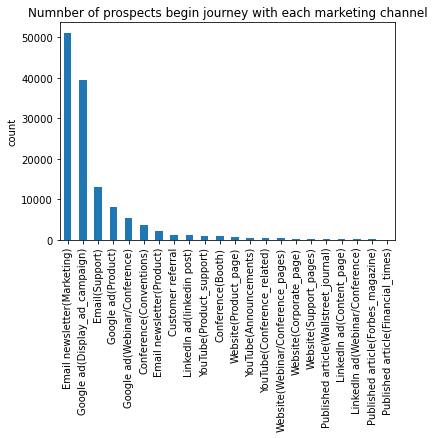

In [103]:
paths2['first'].value_counts().plot(kind='bar', rot=0, ylabel='count')
plt.xticks(rotation = 90)
plt.title('Numnber of prospects begin journey with each marketing channel')
plt.show()

In [104]:
paths2['conversions'] = 0
for i in paths2.index:
    if 'Contract signed' in paths2.loc[i,'sales_chan']:
        paths2.loc[i,'conversions'] = 1
paths2

,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan,mark_chan,sales_channel,first,last,conversions
0,OPP_0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",4,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing),Discovery call,0
1,OPP_1,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified,Email newsletter(Marketing),Lead qualified,0
2,OPP_10,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified,Email newsletter(Marketing),Lead qualified,0
3,OPP_100,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call]",3,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call,Email newsletter(Marketing),Connect call,0
4,OPP_1000,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",7,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing),Negotiation,0
...,...,...,...,...,...,...,...,...,...,...,...
130003,OPP_99995,"[Email(Support), Email(Support)]","[Email(Support), Email(Support)]",[],0,2,Email(Support) > Email(Support),,Email(Support),Email(Support),0
130004,OPP_99996,[YouTube(Announcements)],[YouTube(Announcements)],[],0,1,YouTube(Announcements),,YouTube(Announcements),YouTube(Announcements),0
130005,OPP_99997,[Website(Corporate_page)],[Website(Corporate_page)],[],0,1,Website(Corporate_page),,Website(Corporate_page),Website(Corporate_page),0
130006,OPP_99998,"[Email(Support), Email(Support), Email(Support...","[Email(Support), Email(Support), Email(Support...",[],0,14,Email(Support) > Email(Support) > Email(Suppor...,,Email(Support),Website(Corporate_page),0


In [105]:
x = paths2.loc[paths2['conversions'] == 1]
y = x.groupby('first')['last'].count()
y

first
Conference(Booth)                           3
Conference(Conventions)                     5
Customer referral                           7
Email newsletter(Marketing)              1014
Email newsletter(Product)                 154
Email(Support)                              7
Google ad(Display_ad_campaign)           1956
Google ad(Product)                         12
Google ad(Webinar/Conference)               4
LinkedIn ad(Content_page)                   6
LinkedIn ad(Webinar/Conference)             4
LinkedIn ad(linkedin post)                 29
Published article(Financial_times)          4
Published article(Forbes_magazine)          7
Published article(Wallstreet_journal)       9
Website(Corporate_page)                     4
Website(Product_page)                      51
Website(Support_pages)                      2
Website(Webinar/Conference_pages)           2
YouTube(Announcements)                      3
YouTube(Conference_related)                 7
YouTube(Product_support)    

In [106]:
z = (x.groupby('first')['last'].count())/len(qualified) * 100
z

first
Conference(Booth)                        0.009190
Conference(Conventions)                  0.015317
Customer referral                        0.021443
Email newsletter(Marketing)              3.106237
Email newsletter(Product)                0.471756
Email(Support)                           0.021443
Google ad(Display_ad_campaign)           5.991913
Google ad(Product)                       0.036760
Google ad(Webinar/Conference)            0.012253
LinkedIn ad(Content_page)                0.018380
LinkedIn ad(Webinar/Conference)          0.012253
LinkedIn ad(linkedin post)               0.088837
Published article(Financial_times)       0.012253
Published article(Forbes_magazine)       0.021443
Published article(Wallstreet_journal)    0.027570
Website(Corporate_page)                  0.012253
Website(Product_page)                    0.156231
Website(Support_pages)                   0.006127
Website(Webinar/Conference_pages)        0.006127
YouTube(Announcements)                   0.0

In [107]:
z.to_csv('share.csv')

In [108]:
mar

['Email newsletter(Marketing)',
 'LinkedIn ad(Content_page)',
 'YouTube(Product_support)',
 'Website(Product_page)',
 'Google ad(Display_ad_campaign)',
 'LinkedIn ad(linkedin post)',
 'Email newsletter(Product)',
 'LinkedIn ad(Webinar/Conference)',
 'Email(Support)',
 'LinkedIn ad(Product)',
 'Conference(Conventions)',
 'Website(Support_pages)',
 'Google ad(Product)',
 'Customer referral',
 'Published article(Wallstreet_journal)',
 'Google ad(Webinar/Conference)',
 'YouTube(Conference_related)',
 'Published article(Forbes_magazine)',
 'Website(Webinar/Conference_pages)',
 'YouTube(Announcements)',
 'Conference(Booth)',
 'Published article(Financial_times)',
 'Website(Corporate_page)']

In [109]:
y1 = y.sort_values(ascending=False)
y1

first
Google ad(Display_ad_campaign)           1956
Email newsletter(Marketing)              1014
Email newsletter(Product)                 154
Website(Product_page)                      51
LinkedIn ad(linkedin post)                 29
Google ad(Product)                         12
Published article(Wallstreet_journal)       9
Published article(Forbes_magazine)          7
YouTube(Conference_related)                 7
YouTube(Product_support)                    7
Email(Support)                              7
Customer referral                           7
LinkedIn ad(Content_page)                   6
Conference(Conventions)                     5
LinkedIn ad(Webinar/Conference)             4
Published article(Financial_times)          4
Google ad(Webinar/Conference)               4
Website(Corporate_page)                     4
YouTube(Announcements)                      3
Conference(Booth)                           3
Website(Support_pages)                      2
Website(Webinar/Conference_p

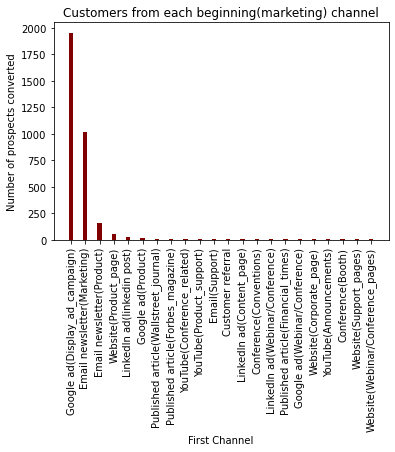

In [110]:
plt.bar(list(y1.index),list(y1),color = 'maroon', width = 0.3)
plt.xlabel('First Channel')
plt.ylabel('Number of prospects converted')
plt.title("Customers from each beginning(marketing) channel")
plt.xticks(rotation = 90)
plt.show()

In [111]:
c = 0 
s = 0
for i in range(len(paths1)):
    if len(paths1['Opportunity_stage'].loc[i]) != 1 and (paths1['Opportunity_stage'].loc[i])[0] == 'LinkedIn ad' and (paths1['Opportunity_stage'].loc[i])[1] == 'Email newsletter':
        c += 1

    elif len(paths1['Opportunity_stage'].loc[i]) == 1:
        s += 1

print(c)
print(s)

NameError: name 'paths1' is not defined

In [ ]:
maxi = 0
for i in range(len(paths2)):
    if len(paths2['Opportunity_stage'].loc[i]) > maxi and paths2['conversions'].loc[i] == 1:
        maxi = len(paths2['Opportunity_stage'].loc[i])

print('Maximum number of channels used by a customer are:', maxi)

Maximum number of channels used by a customer are: 21


In [ ]:
#number of channels and converted
def channels_converted(df, n):
    q = 0
    for i in range(len(df)):
        if len(df['Opportunity_stage'].loc[i]) == n and df['conversions'].loc[i] == 1:
            q += 1

    return q

In [ ]:
for i in range(1,maxi+1):
    print('Number of {} channels used to convert are:'.format(i), channels_converted(paths2, i))

Number of 1 channels used to convert are: 0
Number of 2 channels used to convert are: 0
Number of 3 channels used to convert are: 0
Number of 4 channels used to convert are: 0
Number of 5 channels used to convert are: 0
Number of 6 channels used to convert are: 0
Number of 7 channels used to convert are: 0
Number of 8 channels used to convert are: 0
Number of 9 channels used to convert are: 0
Number of 10 channels used to convert are: 1
Number of 11 channels used to convert are: 1965
Number of 12 channels used to convert are: 1252
Number of 13 channels used to convert are: 31
Number of 14 channels used to convert are: 22
Number of 15 channels used to convert are: 5
Number of 16 channels used to convert are: 11
Number of 17 channels used to convert are: 3
Number of 18 channels used to convert are: 3
Number of 19 channels used to convert are: 2
Number of 20 channels used to convert are: 1
Number of 21 channels used to convert are: 1


In [ ]:
d = {}
for i in all:
    if i in d:
        continue
    else:
        d[i] = len(paths2.loc[paths2['last'] == i])

In [ ]:
paths2

,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan,mark_chan,sales_channel,first,last,conversions
0,OPP_0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",4,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing),Discovery call,0
1,OPP_1,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified,Email newsletter(Marketing),Lead qualified,0
2,OPP_10,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified]",2,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified,Email newsletter(Marketing),Lead qualified,0
3,OPP_100,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call]",3,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call,Email newsletter(Marketing),Connect call,0
4,OPP_1000,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Email newsletter(Marketing), LinkedIn ad(Cont...","[Enquiry, Lead qualified, Connect call, Discov...",7,4,Email newsletter(Marketing) > LinkedIn ad(Cont...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing),Negotiation,0
...,...,...,...,...,...,...,...,...,...,...,...
130003,OPP_99995,"[Email newsletter(Support), Email newsletter(S...","[Email newsletter(Support), Email newsletter(S...",[],0,2,Email newsletter(Support) > Email newsletter(S...,,Email newsletter(Support),Email newsletter(Support),0
130004,OPP_99996,[YouTube(Announcements)],[YouTube(Announcements)],[],0,1,YouTube(Announcements),,YouTube(Announcements),YouTube(Announcements),0
130005,OPP_99997,[Website(Corporate_page)],[Website(Corporate_page)],[],0,1,Website(Corporate_page),,Website(Corporate_page),Website(Corporate_page),0
130006,OPP_99998,"[Email newsletter(Support), Email newsletter(S...","[Email newsletter(Support), Email newsletter(S...",[],0,14,Email newsletter(Support) > Email newsletter(S...,,Email newsletter(Support),Website(Corporate_page),0


In [ ]:
d

{'Email newsletter(Marketing)': 686,
 'LinkedIn ad(Content_page)': 289,
 'YouTube(Product_support)': 1203,
 'Website(Product_page)': 62399,
 'Enquiry': 0,
 'Lead qualified': 6517,
 'Connect call': 6530,
 'Discovery call': 4901,
 'Demonstration': 4849,
 'Stakeholders buy in': 3254,
 'Negotiation': 3296,
 'Google ad(Display_ad_campaign)': 2483,
 'Contract signed': 3297,
 'LinkedIn ad(linkedin post)': 1227,
 'Email newsletter(Product)': 2816,
 'LinkedIn ad(Webinar/Conference)': 313,
 'Email newsletter(Support)': 962,
 'LinkedIn ad(Product)': 0,
 'Conference(Conventions)': 0,
 'Website(Support_pages)': 21460,
 'Google ad(Product)': 1296,
 'Customer referral': 0,
 'Published article(Wallstreet_journal)': 0,
 'Google ad(Webinar/Conference)': 259,
 'YouTube(Conference_related)': 573,
 'Published article(Forbes_magazine)': 0,
 'Website(Webinar/Conference_pages)': 385,
 'YouTube(Announcements)': 658,
 'Conference(Booth)': 0,
 'Published article(Financial_times)': 0,
 'Website(Corporate_page)': 

In [ ]:
k = list(paths2[paths2.Opportunity_ID == 'OPP_0']['Opportunity_stage'])
k

[['Email newsletter(Marketing)',
  'LinkedIn ad(Content_page)',
  'YouTube(Product_support)',
  'Website(Product_page)',
  'Enquiry',
  'Lead qualified',
  'Connect call',
  'Discovery call']]

In [ ]:
non_converted = qualified.copy()

In [ ]:
ids = list(converted.Opportunity_ID)
len(ids)

3297

In [ ]:
for i in ids:
    non_converted.drop(non_converted[non_converted['Opportunity_ID'] == i].index, inplace = True)

non_converted

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
5,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17
13,OPP_1,2018-09-22 12:23:16+00:00,Lead qualified,0,0,1,8
19,OPP_10,2019-04-21 08:35:09+00:00,Lead qualified,0,0,1,19
25,OPP_100,2018-11-09 08:22:43+00:00,Lead qualified,0,0,1,10
32,OPP_1000,2018-10-05 17:07:57+00:00,Lead qualified,0,0,1,8
...,...,...,...,...,...,...,...
618875,OPP_9993,2018-09-22 12:46:55+00:00,Lead qualified,0,0,1,7
618908,OPP_9994,2018-09-11 12:33:11+00:00,Lead qualified,0,0,1,5
618967,OPP_9996,2018-09-30 12:49:23+00:00,Lead qualified,0,0,1,7
619039,OPP_9998,2018-08-24 17:25:00+00:00,Lead qualified,0,0,1,6


In [ ]:
non_converted[non_converted.conversions == 1]

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit


In [ ]:
ind = paths2[['Opportunity_ID','Opportunity_stage']]
ds = pd.merge(non_converted, ind, on ='Opportunity_ID', how= 'left')
ds

,Opportunity_ID,Timestamp,Opportunity_stage_x,conversions,market_stage,sales_stage,visit,Opportunity_stage_y
0,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
1,OPP_1,2018-09-22 12:23:16+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
2,OPP_10,2019-04-21 08:35:09+00:00,Lead qualified,0,0,1,19,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
3,OPP_100,2018-11-09 08:22:43+00:00,Lead qualified,0,0,1,10,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
4,OPP_1000,2018-10-05 17:07:57+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
...,...,...,...,...,...,...,...,...
29342,OPP_9993,2018-09-22 12:46:55+00:00,Lead qualified,0,0,1,7,"[Website(Corporate_page), Website(Corporate_pa..."
29343,OPP_9994,2018-09-11 12:33:11+00:00,Lead qualified,0,0,1,5,"[YouTube(Announcements), LinkedIn ad(Webinar/C..."
29344,OPP_9996,2018-09-30 12:49:23+00:00,Lead qualified,0,0,1,7,"[Google ad(Webinar/Conference), Google ad(Webi..."
29345,OPP_9998,2018-08-24 17:25:00+00:00,Lead qualified,0,0,1,6,"[LinkedIn ad(Webinar/Conference), YouTube(Anno..."


In [ ]:
ds['Opportunity_stage_y'][0]

['Email newsletter(Marketing)',
 'LinkedIn ad(Content_page)',
 'YouTube(Product_support)',
 'Website(Product_page)',
 'Enquiry',
 'Lead qualified',
 'Connect call',
 'Discovery call']

In [ ]:
lis = list(ds.Opportunity_ID)
if lis == list(non_converted.Opportunity_ID):
    print('Both are same')
else:
    print('Something is happening')

Both are same


In [ ]:
for i in range(len(ds)):
    if len(ds.loc[i,'Opportunity_stage_y']) < 10:
        print(i)
        break

0


In [ ]:
ds['breakdown'] = ''
for i in range(len(ds)):
    ds['breakdown'].loc[i] = ds.loc[i,'Opportunity_stage_y'][-1]

ds

c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Opportunity_ID,Timestamp,Opportunity_stage_x,conversions,market_stage,sales_stage,visit,Opportunity_stage_y,breakdown
0,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Discovery call
1,OPP_1,2018-09-22 12:23:16+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Lead qualified
2,OPP_10,2019-04-21 08:35:09+00:00,Lead qualified,0,0,1,19,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Lead qualified
3,OPP_100,2018-11-09 08:22:43+00:00,Lead qualified,0,0,1,10,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Connect call
4,OPP_1000,2018-10-05 17:07:57+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Negotiation
...,...,...,...,...,...,...,...,...,...
29342,OPP_9993,2018-09-22 12:46:55+00:00,Lead qualified,0,0,1,7,"[Website(Corporate_page), Website(Corporate_pa...",Negotiation
29343,OPP_9994,2018-09-11 12:33:11+00:00,Lead qualified,0,0,1,5,"[YouTube(Announcements), LinkedIn ad(Webinar/C...",Lead qualified
29344,OPP_9996,2018-09-30 12:49:23+00:00,Lead qualified,0,0,1,7,"[Google ad(Webinar/Conference), Google ad(Webi...",Negotiation
29345,OPP_9998,2018-08-24 17:25:00+00:00,Lead qualified,0,0,1,6,"[LinkedIn ad(Webinar/Conference), YouTube(Anno...",Lead qualified


In [ ]:
ds.breakdown.value_counts()

Connect call           6530
Lead qualified         6517
Discovery call         4901
Demonstration          4849
Negotiation            3296
Stakeholders buy in    3254
Name: breakdown, dtype: int64

In [ ]:
ds

,Opportunity_ID,Timestamp,Opportunity_stage_x,conversions,market_stage,sales_stage,visit,Opportunity_stage_y,breakdown
0,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Discovery call
1,OPP_1,2018-09-22 12:23:16+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Lead qualified
2,OPP_10,2019-04-21 08:35:09+00:00,Lead qualified,0,0,1,19,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Lead qualified
3,OPP_100,2018-11-09 08:22:43+00:00,Lead qualified,0,0,1,10,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Connect call
4,OPP_1000,2018-10-05 17:07:57+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Negotiation
...,...,...,...,...,...,...,...,...,...
29342,OPP_9993,2018-09-22 12:46:55+00:00,Lead qualified,0,0,1,7,"[Website(Corporate_page), Website(Corporate_pa...",Negotiation
29343,OPP_9994,2018-09-11 12:33:11+00:00,Lead qualified,0,0,1,5,"[YouTube(Announcements), LinkedIn ad(Webinar/C...",Lead qualified
29344,OPP_9996,2018-09-30 12:49:23+00:00,Lead qualified,0,0,1,7,"[Google ad(Webinar/Conference), Google ad(Webi...",Negotiation
29345,OPP_9998,2018-08-24 17:25:00+00:00,Lead qualified,0,0,1,6,"[LinkedIn ad(Webinar/Conference), YouTube(Anno...",Lead qualified


In [ ]:
#ds means non-coverted ones but qualified
ds['market_chan'] = ''
ds['num_chan'] = 0
for i in range(len(ds)):
    ds['market_chan'].loc[i] = [j for j in ds.loc[i,'Opportunity_stage_y'] if j not in sales_channels]
    ds['num_chan'].loc[i] = len(ds['market_chan'].loc[i])


c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
ds

,Opportunity_ID,Timestamp,Opportunity_stage_x,conversions,market_stage,sales_stage,visit,Opportunity_stage_y,breakdown,market_chan,num_chan
0,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Discovery call,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4
1,OPP_1,2018-09-22 12:23:16+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Lead qualified,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4
2,OPP_10,2019-04-21 08:35:09+00:00,Lead qualified,0,0,1,19,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Lead qualified,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4
3,OPP_100,2018-11-09 08:22:43+00:00,Lead qualified,0,0,1,10,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Connect call,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4
4,OPP_1000,2018-10-05 17:07:57+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Negotiation,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4
...,...,...,...,...,...,...,...,...,...,...,...
29342,OPP_9993,2018-09-22 12:46:55+00:00,Lead qualified,0,0,1,7,"[Website(Corporate_page), Website(Corporate_pa...",Negotiation,"[Website(Corporate_page), Website(Corporate_pa...",5
29343,OPP_9994,2018-09-11 12:33:11+00:00,Lead qualified,0,0,1,5,"[YouTube(Announcements), LinkedIn ad(Webinar/C...",Lead qualified,"[YouTube(Announcements), LinkedIn ad(Webinar/C...",3
29344,OPP_9996,2018-09-30 12:49:23+00:00,Lead qualified,0,0,1,7,"[Google ad(Webinar/Conference), Google ad(Webi...",Negotiation,"[Google ad(Webinar/Conference), Google ad(Webi...",5
29345,OPP_9998,2018-08-24 17:25:00+00:00,Lead qualified,0,0,1,6,"[LinkedIn ad(Webinar/Conference), YouTube(Anno...",Lead qualified,"[LinkedIn ad(Webinar/Conference), YouTube(Anno...",4


In [ ]:
con = paths2[paths2['conversions'] == 1]
con

,Opportunity_ID,Opportunity_stage,market_chan,sales_chan,num_sales_chan,num_mark_chan,mark_chan,sales_channel,first,last,conversions
5,OPP_10000,"[Google ad(Display_ad_campaign), YouTube(Produ...","[Google ad(Display_ad_campaign), YouTube(Produ...","[Enquiry, Lead qualified, Connect call, Discov...",8,3,Google ad(Display_ad_campaign) > YouTube(Produ...,Enquiry > Lead qualified > Connect call > Disc...,Google ad(Display_ad_campaign),Contract signed,1
71,OPP_10006,"[Email newsletter(Marketing), LinkedIn ad(link...","[Email newsletter(Marketing), LinkedIn ad(link...","[Enquiry, Lead qualified, Connect call, Discov...",8,4,Email newsletter(Marketing) > LinkedIn ad(link...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing),Contract signed,1
116,OPP_10010,"[Email newsletter(Marketing), LinkedIn ad(link...","[Email newsletter(Marketing), LinkedIn ad(link...","[Enquiry, Lead qualified, Connect call, Discov...",8,4,Email newsletter(Marketing) > LinkedIn ad(link...,Enquiry > Lead qualified > Connect call > Disc...,Email newsletter(Marketing),Contract signed,1
215,OPP_10019,"[Google ad(Display_ad_campaign), YouTube(Produ...","[Google ad(Display_ad_campaign), YouTube(Produ...","[Enquiry, Lead qualified, Connect call, Discov...",8,3,Google ad(Display_ad_campaign) > YouTube(Produ...,Enquiry > Lead qualified > Connect call > Disc...,Google ad(Display_ad_campaign),Contract signed,1
226,OPP_1002,"[Google ad(Display_ad_campaign), Email newslet...","[Google ad(Display_ad_campaign), Email newslet...","[Enquiry, Lead qualified, Connect call, Discov...",8,3,Google ad(Display_ad_campaign) > Email newslet...,Enquiry > Lead qualified > Connect call > Disc...,Google ad(Display_ad_campaign),Contract signed,1
...,...,...,...,...,...,...,...,...,...,...,...
129643,OPP_9967,"[Customer referral, Email newsletter(Support),...","[Customer referral, Email newsletter(Support),...","[Enquiry, Lead qualified, Connect call, Discov...",8,8,Customer referral > Email newsletter(Support) ...,Enquiry > Lead qualified > Connect call > Disc...,Customer referral,Contract signed,1
129654,OPP_9968,"[YouTube(Announcements), LinkedIn ad(Webinar/C...","[YouTube(Announcements), LinkedIn ad(Webinar/C...","[Enquiry, Lead qualified, Connect call, Discov...",8,4,YouTube(Announcements) > LinkedIn ad(Webinar/C...,Enquiry > Lead qualified > Connect call > Disc...,YouTube(Announcements),Contract signed,1
129832,OPP_9984,"[LinkedIn ad(Webinar/Conference), Google ad(We...","[LinkedIn ad(Webinar/Conference), Google ad(We...","[Enquiry, Lead qualified, Connect call, Discov...",8,4,LinkedIn ad(Webinar/Conference) > Google ad(We...,Enquiry > Lead qualified > Connect call > Disc...,LinkedIn ad(Webinar/Conference),Contract signed,1
129843,OPP_9985,"[Website(Corporate_page), Website(Corporate_pa...","[Website(Corporate_page), Website(Corporate_pa...","[Enquiry, Lead qualified, Connect call, Discov...",8,11,Website(Corporate_page) > Website(Corporate_pa...,Enquiry > Lead qualified > Connect call > Disc...,Website(Corporate_page),Contract signed,1


In [ ]:
con['num_mark_chan'].describe()

count    3297.000000
mean        3.463755
std         0.735688
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: num_mark_chan, dtype: float64

In [ ]:
ds['num_chan'].describe()

count    29347.000000
mean         3.976897
std          1.083137
min          3.000000
25%          4.000000
50%          4.000000
75%          4.000000
max         47.000000
Name: num_chan, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619117 entries, 0 to 619116
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Opportunity_ID     619117 non-null  object             
 1   Timestamp          619117 non-null  datetime64[ns, UTC]
 2   Opportunity_stage  619117 non-null  object             
 3   conversions        619117 non-null  int64              
 4   market_stage       619117 non-null  int64              
 5   sales_stage        619117 non-null  int64              
 6   visit              619117 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 33.1+ MB


In [ ]:
from datetime import datetime
time1 = df['Timestamp'][0]
time2 = df['Timestamp'][1]
tim = time2 - time1

In [ ]:
tim

Timedelta('17 days 00:00:00')

In [ ]:
time = df1.groupby('Opportunity_ID')['Timestamp','Opportunity_stage'].aggregate(lambda x: x.tolist()).reset_index()
time

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7556/925453216.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time = df1.groupby('Opportunity_ID')['Timestamp','Opportunity_stage'].aggregate(lambda x: x.tolist()).reset_index()


,Opportunity_ID,Timestamp,Opportunity_stage
0,OPP_0,"[2018-07-05 21:16:20+00:00, 2018-07-22 21:16:2...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
1,OPP_1,"[2018-07-04 12:23:16+00:00, 2018-07-08 12:23:1...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
2,OPP_10,"[2018-07-11 08:35:09+00:00, 2018-07-17 08:35:0...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
3,OPP_100,"[2018-07-04 08:22:43+00:00, 2018-07-07 08:22:4...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
4,OPP_1000,"[2018-07-03 17:07:57+00:00, 2018-07-21 17:07:5...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
...,...,...,...
130003,OPP_99995,"[2018-07-02 13:32:24+00:00, 2018-07-20 10:49:3...","[Email newsletter(Support), Email newsletter(S..."
130004,OPP_99996,[2018-07-21 20:14:16+00:00],[YouTube(Announcements)]
130005,OPP_99997,[2018-07-25 19:45:06+00:00],[Website(Corporate_page)]
130006,OPP_99998,"[2018-07-02 09:42:58+00:00, 2018-07-02 13:41:5...","[Email newsletter(Support), Email newsletter(S..."


In [ ]:
time1 = df1.groupby('Opportunity_ID')['Timestamp','Opportunity_stage'].aggregate(lambda x: x.tolist()).reset_index()
time1

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7556/585309871.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time1 = df1.groupby('Opportunity_ID')['Timestamp','Opportunity_stage'].aggregate(lambda x: x.tolist()).reset_index()


,Opportunity_ID,Timestamp,Opportunity_stage
0,OPP_0,"[2018-07-05 21:16:20+00:00, 2018-07-22 21:16:2...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
1,OPP_1,"[2018-07-04 12:23:16+00:00, 2018-07-08 12:23:1...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
2,OPP_10,"[2018-07-11 08:35:09+00:00, 2018-07-17 08:35:0...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
3,OPP_100,"[2018-07-04 08:22:43+00:00, 2018-07-07 08:22:4...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
4,OPP_1000,"[2018-07-03 17:07:57+00:00, 2018-07-21 17:07:5...","[Email newsletter(Marketing), LinkedIn ad(Cont..."
...,...,...,...
130003,OPP_99995,"[2018-07-02 13:32:24+00:00, 2018-07-20 10:49:3...","[Email newsletter(Support), Email newsletter(S..."
130004,OPP_99996,[2018-07-21 20:14:16+00:00],[YouTube(Announcements)]
130005,OPP_99997,[2018-07-25 19:45:06+00:00],[Website(Corporate_page)]
130006,OPP_99998,"[2018-07-02 09:42:58+00:00, 2018-07-02 13:41:5...","[Email newsletter(Support), Email newsletter(S..."


In [ ]:
len(list(time[time['Opportunity_ID'] == 'OPP_0']['Opportunity_stage'])[0]),len(list(time[time['Opportunity_ID'] == 'OPP_0']['Timestamp'])[0])

(8, 8)

In [ ]:
time.iloc[0][1]

[Timestamp('2018-07-05 21:16:20+0000', tz='UTC'),
 Timestamp('2018-07-22 21:16:20+0000', tz='UTC'),
 Timestamp('2018-08-06 21:16:20+0000', tz='UTC'),
 Timestamp('2018-08-28 21:16:20+0000', tz='UTC'),
 Timestamp('2019-02-17 21:16:20+0000', tz='UTC'),
 Timestamp('2019-03-13 21:16:20+0000', tz='UTC'),
 Timestamp('2019-03-22 21:16:20+0000', tz='UTC'),
 Timestamp('2019-04-12 21:16:20+0000', tz='UTC')]

In [ ]:
time['conversion'] = paths2['conversions']
time

,Opportunity_ID,Timestamp,Opportunity_stage,conversion
0,OPP_0,"[2018-07-05 21:16:20+00:00, 2018-07-22 21:16:2...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
1,OPP_1,"[2018-07-04 12:23:16+00:00, 2018-07-08 12:23:1...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
2,OPP_10,"[2018-07-11 08:35:09+00:00, 2018-07-17 08:35:0...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
3,OPP_100,"[2018-07-04 08:22:43+00:00, 2018-07-07 08:22:4...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
4,OPP_1000,"[2018-07-03 17:07:57+00:00, 2018-07-21 17:07:5...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
...,...,...,...,...
130003,OPP_99995,"[2018-07-02 13:32:24+00:00, 2018-07-20 10:49:3...","[Email newsletter(Support), Email newsletter(S...",0
130004,OPP_99996,[2018-07-21 20:14:16+00:00],[YouTube(Announcements)],0
130005,OPP_99997,[2018-07-25 19:45:06+00:00],[Website(Corporate_page)],0
130006,OPP_99998,"[2018-07-02 09:42:58+00:00, 2018-07-02 13:41:5...","[Email newsletter(Support), Email newsletter(S...",0


In [ ]:
con_time = time[time['conversion'] == 1]
con_time

,Opportunity_ID,Timestamp,Opportunity_stage,conversion
5,OPP_10000,"[2018-07-14 14:49:02+00:00, 2018-07-26 14:49:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1
71,OPP_10006,"[2018-07-06 15:45:54+00:00, 2018-07-19 15:45:5...","[Email newsletter(Marketing), LinkedIn ad(link...",1
116,OPP_10010,"[2018-07-22 21:10:06+00:00, 2018-08-06 21:10:0...","[Email newsletter(Marketing), LinkedIn ad(link...",1
215,OPP_10019,"[2018-07-09 13:04:01+00:00, 2018-07-21 13:04:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1
226,OPP_1002,"[2018-07-29 11:15:04+00:00, 2018-08-04 11:15:0...","[Google ad(Display_ad_campaign), Email newslet...",1
...,...,...,...,...
129643,OPP_9967,"[2018-07-06 14:45:32+00:00, 2018-07-30 14:45:3...","[Customer referral, Email newsletter(Support),...",1
129654,OPP_9968,"[2018-07-26 11:58:58+00:00, 2018-07-30 11:58:5...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",1
129832,OPP_9984,"[2018-07-28 14:18:50+00:00, 2018-08-02 14:18:5...","[LinkedIn ad(Webinar/Conference), Google ad(We...",1
129843,OPP_9985,"[2018-07-04 17:31:12+00:00, 2018-07-23 17:31:1...","[Website(Corporate_page), Website(Corporate_pa...",1


In [ ]:
con_time['duration'] = 0
for i in ids:
    a = con_time[con_time['Opportunity_ID'] == i].index
    b = list(con_time.loc[a,'Timestamp'])
    con_time['duration'].loc[a] = b[0][-1] - b[0][0]

con_time

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7556/3492185082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_time['duration'] = 0
c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Opportunity_ID,Timestamp,Opportunity_stage,conversion,duration
5,OPP_10000,"[2018-07-14 14:49:02+00:00, 2018-07-26 14:49:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,222 days 00:00:00
71,OPP_10006,"[2018-07-06 15:45:54+00:00, 2018-07-19 15:45:5...","[Email newsletter(Marketing), LinkedIn ad(link...",1,174 days 00:00:00
116,OPP_10010,"[2018-07-22 21:10:06+00:00, 2018-08-06 21:10:0...","[Email newsletter(Marketing), LinkedIn ad(link...",1,141 days 00:00:00
215,OPP_10019,"[2018-07-09 13:04:01+00:00, 2018-07-21 13:04:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,141 days 00:00:00
226,OPP_1002,"[2018-07-29 11:15:04+00:00, 2018-08-04 11:15:0...","[Google ad(Display_ad_campaign), Email newslet...",1,133 days 00:00:00
...,...,...,...,...,...
129643,OPP_9967,"[2018-07-06 14:45:32+00:00, 2018-07-30 14:45:3...","[Customer referral, Email newsletter(Support),...",1,205 days 00:00:00
129654,OPP_9968,"[2018-07-26 11:58:58+00:00, 2018-07-30 11:58:5...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",1,129 days 00:00:00
129832,OPP_9984,"[2018-07-28 14:18:50+00:00, 2018-08-02 14:18:5...","[LinkedIn ad(Webinar/Conference), Google ad(We...",1,145 days 00:00:00
129843,OPP_9985,"[2018-07-04 17:31:12+00:00, 2018-07-23 17:31:1...","[Website(Corporate_page), Website(Corporate_pa...",1,278 days 00:00:00


In [ ]:
con_time['duration'] = (con_time['duration'] / np.timedelta64(1, 'D')).astype(int)
con_time

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7556/1557146637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_time['duration'] = (con_time['duration'] / np.timedelta64(1, 'D')).astype(int)


,Opportunity_ID,Timestamp,Opportunity_stage,conversion,duration
5,OPP_10000,"[2018-07-14 14:49:02+00:00, 2018-07-26 14:49:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,222
71,OPP_10006,"[2018-07-06 15:45:54+00:00, 2018-07-19 15:45:5...","[Email newsletter(Marketing), LinkedIn ad(link...",1,174
116,OPP_10010,"[2018-07-22 21:10:06+00:00, 2018-08-06 21:10:0...","[Email newsletter(Marketing), LinkedIn ad(link...",1,141
215,OPP_10019,"[2018-07-09 13:04:01+00:00, 2018-07-21 13:04:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,141
226,OPP_1002,"[2018-07-29 11:15:04+00:00, 2018-08-04 11:15:0...","[Google ad(Display_ad_campaign), Email newslet...",1,133
...,...,...,...,...,...
129643,OPP_9967,"[2018-07-06 14:45:32+00:00, 2018-07-30 14:45:3...","[Customer referral, Email newsletter(Support),...",1,205
129654,OPP_9968,"[2018-07-26 11:58:58+00:00, 2018-07-30 11:58:5...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",1,129
129832,OPP_9984,"[2018-07-28 14:18:50+00:00, 2018-08-02 14:18:5...","[LinkedIn ad(Webinar/Conference), Google ad(We...",1,145
129843,OPP_9985,"[2018-07-04 17:31:12+00:00, 2018-07-23 17:31:1...","[Website(Corporate_page), Website(Corporate_pa...",1,278


In [ ]:
con_time['duration'].describe()

count    3297.000000
mean      162.354261
std        33.578331
min        74.000000
25%       140.000000
50%       158.000000
75%       179.000000
max       297.000000
Name: duration, dtype: float64

In [ ]:
ds['first'] = ''
for i in range(len(ds)):
    ds['first'].loc[i] = ds.loc[i,'Opportunity_stage_y'][0]

c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
ds

,Opportunity_ID,Timestamp,Opportunity_stage_x,conversions,market_stage,sales_stage,visit,Opportunity_stage_y,breakdown,market_chan,num_chan,first
0,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Discovery call,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4,Email newsletter(Marketing)
1,OPP_1,2018-09-22 12:23:16+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Lead qualified,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4,Email newsletter(Marketing)
2,OPP_10,2019-04-21 08:35:09+00:00,Lead qualified,0,0,1,19,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Lead qualified,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4,Email newsletter(Marketing)
3,OPP_100,2018-11-09 08:22:43+00:00,Lead qualified,0,0,1,10,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Connect call,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4,Email newsletter(Marketing)
4,OPP_1000,2018-10-05 17:07:57+00:00,Lead qualified,0,0,1,8,"[Email newsletter(Marketing), LinkedIn ad(Cont...",Negotiation,"[Email newsletter(Marketing), LinkedIn ad(Cont...",4,Email newsletter(Marketing)
...,...,...,...,...,...,...,...,...,...,...,...,...
29342,OPP_9993,2018-09-22 12:46:55+00:00,Lead qualified,0,0,1,7,"[Website(Corporate_page), Website(Corporate_pa...",Negotiation,"[Website(Corporate_page), Website(Corporate_pa...",5,Website(Corporate_page)
29343,OPP_9994,2018-09-11 12:33:11+00:00,Lead qualified,0,0,1,5,"[YouTube(Announcements), LinkedIn ad(Webinar/C...",Lead qualified,"[YouTube(Announcements), LinkedIn ad(Webinar/C...",3,YouTube(Announcements)
29344,OPP_9996,2018-09-30 12:49:23+00:00,Lead qualified,0,0,1,7,"[Google ad(Webinar/Conference), Google ad(Webi...",Negotiation,"[Google ad(Webinar/Conference), Google ad(Webi...",5,Google ad(Webinar/Conference)
29345,OPP_9998,2018-08-24 17:25:00+00:00,Lead qualified,0,0,1,6,"[LinkedIn ad(Webinar/Conference), YouTube(Anno...",Lead qualified,"[LinkedIn ad(Webinar/Conference), YouTube(Anno...",4,LinkedIn ad(Webinar/Conference)


In [ ]:
non = dict(ds['first'].value_counts())
non

{'Email newsletter(Marketing)': 21133,
 'Google ad(Display_ad_campaign)': 5071,
 'Email newsletter(Support)': 866,
 'Email newsletter(Product)': 398,
 'Google ad(Product)': 348,
 'LinkedIn ad(linkedin post)': 259,
 'Published article(Wallstreet_journal)': 231,
 'Conference(Conventions)': 201,
 'YouTube(Product_support)': 179,
 'Website(Product_page)': 163,
 'Customer referral': 135,
 'Published article(Forbes_magazine)': 53,
 'Google ad(Webinar/Conference)': 48,
 'YouTube(Conference_related)': 38,
 'Published article(Financial_times)': 37,
 'YouTube(Announcements)': 36,
 'LinkedIn ad(Content_page)': 34,
 'Website(Webinar/Conference_pages)': 29,
 'Conference(Booth)': 29,
 'LinkedIn ad(Webinar/Conference)': 23,
 'Website(Support_pages)': 18,
 'Website(Corporate_page)': 18}

In [ ]:
non_df = pd.DataFrame(list(non.items()))
non_df

,0,1
0,Email newsletter(Marketing),21133
1,Google ad(Display_ad_campaign),5071
2,Email newsletter(Support),866
3,Email newsletter(Product),398
4,Google ad(Product),348
5,LinkedIn ad(linkedin post),259
6,Published article(Wallstreet_journal),231
7,Conference(Conventions),201
8,YouTube(Product_support),179
9,Website(Product_page),163


In [ ]:
non_df.to_csv('non.csv', index=False)

In [ ]:
c = dict(x['first'].value_counts())
c

{'Google ad(Display_ad_campaign)': 1956,
 'Email newsletter(Marketing)': 1014,
 'Email newsletter(Product)': 154,
 'Website(Product_page)': 51,
 'LinkedIn ad(linkedin post)': 29,
 'Google ad(Product)': 12,
 'Published article(Wallstreet_journal)': 9,
 'Published article(Forbes_magazine)': 7,
 'Email newsletter(Support)': 7,
 'Customer referral': 7,
 'YouTube(Conference_related)': 7,
 'YouTube(Product_support)': 7,
 'LinkedIn ad(Content_page)': 6,
 'Conference(Conventions)': 5,
 'Published article(Financial_times)': 4,
 'LinkedIn ad(Webinar/Conference)': 4,
 'Website(Corporate_page)': 4,
 'Google ad(Webinar/Conference)': 4,
 'Conference(Booth)': 3,
 'YouTube(Announcements)': 3,
 'Website(Webinar/Conference_pages)': 2,
 'Website(Support_pages)': 2}

In [ ]:
c_df = pd.DataFrame(list(c.items()))
c_df

,0,1
0,Google ad(Display_ad_campaign),1956
1,Email newsletter(Marketing),1014
2,Email newsletter(Product),154
3,Website(Product_page),51
4,LinkedIn ad(linkedin post),29
5,Google ad(Product),12
6,Published article(Wallstreet_journal),9
7,Published article(Forbes_magazine),7
8,Email newsletter(Support),7
9,Customer referral,7


In [ ]:
c_df.to_csv('c.csv', index = False)

In [ ]:
con_per = {}
for i in non:
    con_per[i] = c[i]/(c[i] + non[i]) * 100

con_per

{'Email newsletter(Marketing)': 4.578498216462727,
 'Google ad(Display_ad_campaign)': 27.835491674967983,
 'Email newsletter(Support)': 0.8018327605956471,
 'Email newsletter(Product)': 27.898550724637683,
 'Google ad(Product)': 3.3333333333333335,
 'LinkedIn ad(linkedin post)': 10.069444444444445,
 'Published article(Wallstreet_journal)': 3.75,
 'Conference(Conventions)': 2.4271844660194173,
 'YouTube(Product_support)': 3.763440860215054,
 'Website(Product_page)': 23.83177570093458,
 'Customer referral': 4.929577464788732,
 'Published article(Forbes_magazine)': 11.666666666666666,
 'Google ad(Webinar/Conference)': 7.6923076923076925,
 'YouTube(Conference_related)': 15.555555555555555,
 'Published article(Financial_times)': 9.75609756097561,
 'YouTube(Announcements)': 7.6923076923076925,
 'LinkedIn ad(Content_page)': 15.0,
 'Website(Webinar/Conference_pages)': 6.451612903225806,
 'Conference(Booth)': 9.375,
 'LinkedIn ad(Webinar/Conference)': 14.814814814814813,
 'Website(Support_pages

In [ ]:
con_per_df = pd.DataFrame(list(con_per.items()))
con_per_df.to_csv('con_per.csv', index=False)

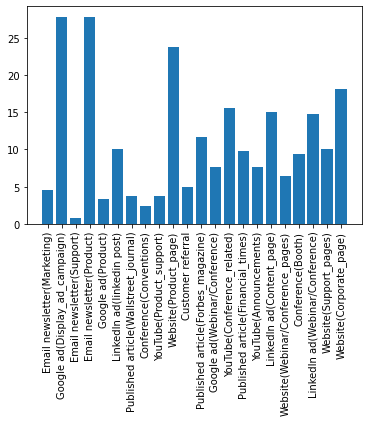

In [ ]:
names = list(con_per.keys())
values = list(con_per.values())

plt.bar(range(len(con_per)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

In [ ]:
ds['Opportunity_stage_y'].loc[1].index('Lead qualified')

5

In [ ]:
time

,Opportunity_ID,Timestamp,Opportunity_stage,conversion
0,OPP_0,"[2018-07-05 21:16:20+00:00, 2018-07-22 21:16:2...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
1,OPP_1,"[2018-07-04 12:23:16+00:00, 2018-07-08 12:23:1...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
2,OPP_10,"[2018-07-11 08:35:09+00:00, 2018-07-17 08:35:0...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
3,OPP_100,"[2018-07-04 08:22:43+00:00, 2018-07-07 08:22:4...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
4,OPP_1000,"[2018-07-03 17:07:57+00:00, 2018-07-21 17:07:5...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0
...,...,...,...,...
130003,OPP_99995,"[2018-07-02 13:32:24+00:00, 2018-07-20 10:49:3...","[Email newsletter(Support), Email newsletter(S...",0
130004,OPP_99996,[2018-07-21 20:14:16+00:00],[YouTube(Announcements)],0
130005,OPP_99997,[2018-07-25 19:45:06+00:00],[Website(Corporate_page)],0
130006,OPP_99998,"[2018-07-02 09:42:58+00:00, 2018-07-02 13:41:5...","[Email newsletter(Support), Email newsletter(S...",0


In [ ]:
q_ind = list(qualified['Opportunity_ID'])
time['qualified'] = ''
for i in range(len(time)):
    if time['Opportunity_ID'].loc[i] in q_ind:
        time['qualified'].loc[i] = 1

    else:
        time['qualified'].loc[i] = 0

time

c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Opportunity_ID,Timestamp,Opportunity_stage,conversion,qualified
0,OPP_0,"[2018-07-05 21:16:20+00:00, 2018-07-22 21:16:2...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
1,OPP_1,"[2018-07-04 12:23:16+00:00, 2018-07-08 12:23:1...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
2,OPP_10,"[2018-07-11 08:35:09+00:00, 2018-07-17 08:35:0...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
3,OPP_100,"[2018-07-04 08:22:43+00:00, 2018-07-07 08:22:4...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
4,OPP_1000,"[2018-07-03 17:07:57+00:00, 2018-07-21 17:07:5...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
...,...,...,...,...,...
130003,OPP_99995,"[2018-07-02 13:32:24+00:00, 2018-07-20 10:49:3...","[Email newsletter(Support), Email newsletter(S...",0,0
130004,OPP_99996,[2018-07-21 20:14:16+00:00],[YouTube(Announcements)],0,0
130005,OPP_99997,[2018-07-25 19:45:06+00:00],[Website(Corporate_page)],0,0
130006,OPP_99998,"[2018-07-02 09:42:58+00:00, 2018-07-02 13:41:5...","[Email newsletter(Support), Email newsletter(S...",0,0


In [ ]:
qc = time.loc[(time['conversion'] == 1) & (time['qualified'] == 1)]
qc

,Opportunity_ID,Timestamp,Opportunity_stage,conversion,qualified
5,OPP_10000,"[2018-07-14 14:49:02+00:00, 2018-07-26 14:49:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,1
71,OPP_10006,"[2018-07-06 15:45:54+00:00, 2018-07-19 15:45:5...","[Email newsletter(Marketing), LinkedIn ad(link...",1,1
116,OPP_10010,"[2018-07-22 21:10:06+00:00, 2018-08-06 21:10:0...","[Email newsletter(Marketing), LinkedIn ad(link...",1,1
215,OPP_10019,"[2018-07-09 13:04:01+00:00, 2018-07-21 13:04:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,1
226,OPP_1002,"[2018-07-29 11:15:04+00:00, 2018-08-04 11:15:0...","[Google ad(Display_ad_campaign), Email newslet...",1,1
...,...,...,...,...,...
129643,OPP_9967,"[2018-07-06 14:45:32+00:00, 2018-07-30 14:45:3...","[Customer referral, Email newsletter(Support),...",1,1
129654,OPP_9968,"[2018-07-26 11:58:58+00:00, 2018-07-30 11:58:5...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",1,1
129832,OPP_9984,"[2018-07-28 14:18:50+00:00, 2018-08-02 14:18:5...","[LinkedIn ad(Webinar/Conference), Google ad(We...",1,1
129843,OPP_9985,"[2018-07-04 17:31:12+00:00, 2018-07-23 17:31:1...","[Website(Corporate_page), Website(Corporate_pa...",1,1


In [ ]:
id_qc = time.loc[(time['conversion'] == 1) & (time['qualified'] == 1)]['Opportunity_ID']
id_qc

5         OPP_10000
71        OPP_10006
116       OPP_10010
215       OPP_10019
226        OPP_1002
            ...    
129643     OPP_9967
129654     OPP_9968
129832     OPP_9984
129843     OPP_9985
129954     OPP_9995
Name: Opportunity_ID, Length: 3297, dtype: object

In [ ]:
l = 0
for m,n in enumerate(qc['Opportunity_stage'].loc[5]):
    if n == 'Lead qualified':
        l = m
       
print(qc.loc[5,'Timestamp'][l] - qc.loc[5,'Timestamp'][0])

138 days 00:00:00


In [ ]:
qc['duration'] = 0
for i in id_qc:
    a = qc[qc['Opportunity_ID'] == i].index
    m = 0
    l = list(qc.loc[a,'Opportunity_stage'])[0]
    for j in range(len(l)):
        if l[j] == 'Lead qualified':
            m = j

    qc['duration'].loc[a] = list(qc.loc[a, 'Timestamp'])[0][m] - list(qc.loc[a, 'Timestamp'])[0][0] 

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7556/2694180882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qc['duration'] = 0
c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
qc

,Opportunity_ID,Timestamp,Opportunity_stage,conversion,qualified,duration
5,OPP_10000,"[2018-07-14 14:49:02+00:00, 2018-07-26 14:49:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,1,138 days 00:00:00
71,OPP_10006,"[2018-07-06 15:45:54+00:00, 2018-07-19 15:45:5...","[Email newsletter(Marketing), LinkedIn ad(link...",1,1,104 days 00:00:00
116,OPP_10010,"[2018-07-22 21:10:06+00:00, 2018-08-06 21:10:0...","[Email newsletter(Marketing), LinkedIn ad(link...",1,1,70 days 00:00:00
215,OPP_10019,"[2018-07-09 13:04:01+00:00, 2018-07-21 13:04:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,1,79 days 00:00:00
226,OPP_1002,"[2018-07-29 11:15:04+00:00, 2018-08-04 11:15:0...","[Google ad(Display_ad_campaign), Email newslet...",1,1,38 days 00:00:00
...,...,...,...,...,...,...
129643,OPP_9967,"[2018-07-06 14:45:32+00:00, 2018-07-30 14:45:3...","[Customer referral, Email newsletter(Support),...",1,1,140 days 00:00:00
129654,OPP_9968,"[2018-07-26 11:58:58+00:00, 2018-07-30 11:58:5...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",1,1,51 days 00:00:00
129832,OPP_9984,"[2018-07-28 14:18:50+00:00, 2018-08-02 14:18:5...","[LinkedIn ad(Webinar/Conference), Google ad(We...",1,1,72 days 00:00:00
129843,OPP_9985,"[2018-07-04 17:31:12+00:00, 2018-07-23 17:31:1...","[Website(Corporate_page), Website(Corporate_pa...",1,1,200 days 00:00:00


In [ ]:
qc['duration'] = (qc['duration'] / np.timedelta64(1, 'D')).astype(int)
qc

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7556/4231503058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qc['duration'] = (qc['duration'] / np.timedelta64(1, 'D')).astype(int)


,Opportunity_ID,Timestamp,Opportunity_stage,conversion,qualified,duration
5,OPP_10000,"[2018-07-14 14:49:02+00:00, 2018-07-26 14:49:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,1,138
71,OPP_10006,"[2018-07-06 15:45:54+00:00, 2018-07-19 15:45:5...","[Email newsletter(Marketing), LinkedIn ad(link...",1,1,104
116,OPP_10010,"[2018-07-22 21:10:06+00:00, 2018-08-06 21:10:0...","[Email newsletter(Marketing), LinkedIn ad(link...",1,1,70
215,OPP_10019,"[2018-07-09 13:04:01+00:00, 2018-07-21 13:04:0...","[Google ad(Display_ad_campaign), YouTube(Produ...",1,1,79
226,OPP_1002,"[2018-07-29 11:15:04+00:00, 2018-08-04 11:15:0...","[Google ad(Display_ad_campaign), Email newslet...",1,1,38
...,...,...,...,...,...,...
129643,OPP_9967,"[2018-07-06 14:45:32+00:00, 2018-07-30 14:45:3...","[Customer referral, Email newsletter(Support),...",1,1,140
129654,OPP_9968,"[2018-07-26 11:58:58+00:00, 2018-07-30 11:58:5...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",1,1,51
129832,OPP_9984,"[2018-07-28 14:18:50+00:00, 2018-08-02 14:18:5...","[LinkedIn ad(Webinar/Conference), Google ad(We...",1,1,72
129843,OPP_9985,"[2018-07-04 17:31:12+00:00, 2018-07-23 17:31:1...","[Website(Corporate_page), Website(Corporate_pa...",1,1,200


In [ ]:
qnc = time.loc[(time['conversion'] == 0) & (time['qualified'] == 1)]
id_qnc = qnc['Opportunity_ID']

In [ ]:
qnc

,Opportunity_ID,Timestamp,Opportunity_stage,conversion,qualified
0,OPP_0,"[2018-07-05 21:16:20+00:00, 2018-07-22 21:16:2...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
1,OPP_1,"[2018-07-04 12:23:16+00:00, 2018-07-08 12:23:1...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
2,OPP_10,"[2018-07-11 08:35:09+00:00, 2018-07-17 08:35:0...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
3,OPP_100,"[2018-07-04 08:22:43+00:00, 2018-07-07 08:22:4...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
4,OPP_1000,"[2018-07-03 17:07:57+00:00, 2018-07-21 17:07:5...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1
...,...,...,...,...,...
129932,OPP_9993,"[2018-07-26 12:46:55+00:00, 2018-08-18 12:46:5...","[Website(Corporate_page), Website(Corporate_pa...",0,1
129943,OPP_9994,"[2018-07-30 12:33:11+00:00, 2018-08-07 12:33:1...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",0,1
129965,OPP_9996,"[2018-07-11 12:49:23+00:00, 2018-07-16 12:49:2...","[Google ad(Webinar/Conference), Google ad(Webi...",0,1
129986,OPP_9998,"[2018-07-03 17:25:00+00:00, 2018-07-13 17:25:0...","[LinkedIn ad(Webinar/Conference), YouTube(Anno...",0,1


In [ ]:
qnc['duration'] = 0
for i in id_qnc:
    a = qnc[qnc['Opportunity_ID'] == i].index
    m = 0
    l = list(qnc.loc[a,'Opportunity_stage'])[0]
    for j in range(len(l)):
        if l[j] == 'Lead qualified':
            m = j

    qnc['duration'].loc[a] = list(qnc.loc[a, 'Timestamp'])[0][m] - list(qnc.loc[a, 'Timestamp'])[0][0] 

qnc

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7556/118006958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qnc['duration'] = 0
c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Opportunity_ID,Timestamp,Opportunity_stage,conversion,qualified,duration
0,OPP_0,"[2018-07-05 21:16:20+00:00, 2018-07-22 21:16:2...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,251 days 00:00:00
1,OPP_1,"[2018-07-04 12:23:16+00:00, 2018-07-08 12:23:1...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,80 days 00:00:00
2,OPP_10,"[2018-07-11 08:35:09+00:00, 2018-07-17 08:35:0...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,284 days 00:00:00
3,OPP_100,"[2018-07-04 08:22:43+00:00, 2018-07-07 08:22:4...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,128 days 00:00:00
4,OPP_1000,"[2018-07-03 17:07:57+00:00, 2018-07-21 17:07:5...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,94 days 00:00:00
...,...,...,...,...,...,...
129932,OPP_9993,"[2018-07-26 12:46:55+00:00, 2018-08-18 12:46:5...","[Website(Corporate_page), Website(Corporate_pa...",0,1,58 days 00:00:00
129943,OPP_9994,"[2018-07-30 12:33:11+00:00, 2018-08-07 12:33:1...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",0,1,43 days 00:00:00
129965,OPP_9996,"[2018-07-11 12:49:23+00:00, 2018-07-16 12:49:2...","[Google ad(Webinar/Conference), Google ad(Webi...",0,1,81 days 00:00:00
129986,OPP_9998,"[2018-07-03 17:25:00+00:00, 2018-07-13 17:25:0...","[LinkedIn ad(Webinar/Conference), YouTube(Anno...",0,1,52 days 00:00:00


In [ ]:
qnc['duration'] = (qnc['duration'] / np.timedelta64(1, 'D')).astype(int)
qnc

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7556/892503659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qnc['duration'] = (qnc['duration'] / np.timedelta64(1, 'D')).astype(int)


,Opportunity_ID,Timestamp,Opportunity_stage,conversion,qualified,duration
0,OPP_0,"[2018-07-05 21:16:20+00:00, 2018-07-22 21:16:2...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,251
1,OPP_1,"[2018-07-04 12:23:16+00:00, 2018-07-08 12:23:1...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,80
2,OPP_10,"[2018-07-11 08:35:09+00:00, 2018-07-17 08:35:0...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,284
3,OPP_100,"[2018-07-04 08:22:43+00:00, 2018-07-07 08:22:4...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,128
4,OPP_1000,"[2018-07-03 17:07:57+00:00, 2018-07-21 17:07:5...","[Email newsletter(Marketing), LinkedIn ad(Cont...",0,1,94
...,...,...,...,...,...,...
129932,OPP_9993,"[2018-07-26 12:46:55+00:00, 2018-08-18 12:46:5...","[Website(Corporate_page), Website(Corporate_pa...",0,1,58
129943,OPP_9994,"[2018-07-30 12:33:11+00:00, 2018-08-07 12:33:1...","[YouTube(Announcements), LinkedIn ad(Webinar/C...",0,1,43
129965,OPP_9996,"[2018-07-11 12:49:23+00:00, 2018-07-16 12:49:2...","[Google ad(Webinar/Conference), Google ad(Webi...",0,1,81
129986,OPP_9998,"[2018-07-03 17:25:00+00:00, 2018-07-13 17:25:0...","[LinkedIn ad(Webinar/Conference), YouTube(Anno...",0,1,52


In [ ]:
qc['duration'].describe()

count    3297.000000
mean       81.477707
std        29.901256
min        23.000000
25%        61.000000
50%        76.000000
75%        95.000000
max       235.000000
Name: duration, dtype: float64

In [ ]:
qnc['duration'].describe()

count    29347.000000
mean        84.545132
std         44.124000
min         14.000000
25%         61.000000
50%         76.000000
75%         95.000000
max        920.000000
Name: duration, dtype: float64

In [180]:
new_data

NameError: name 'new_data' is not defined

In [ ]:
paths2

In [ ]:
new_data1 = new_data.drop(columns = ['conversions', 'market_stage','sales_stage','visit'], axis = 1)
new_data1

In [ ]:
new_data1.to_csv('final_transformed_data.csv', index=False)